# Problem Statement:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

Please note that there are two target variables here: 

1) Next_Tmax: Next day maximum temperature

2) Next_Tmin: Next day  minimum temperature

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
temp=pd.read_csv("E:\\Data Science\\Data Trained Evaluation Project\\temperature.csv")
temp.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [3]:
temp.shape

(7752, 25)

In [4]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [5]:
temp.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [6]:
temp=temp.dropna(axis=0)

Here we drop Nan value rows

In [10]:
temp.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [11]:
temp['Date']=pd.to_datetime(temp['Date'], infer_datetime_format=True)  

In [12]:
temp['Date']

0      2013-06-30
1      2013-06-30
2      2013-06-30
3      2013-06-30
4      2013-06-30
          ...    
7745   2017-08-30
7746   2017-08-30
7747   2017-08-30
7748   2017-08-30
7749   2017-08-30
Name: Date, Length: 7588, dtype: datetime64[ns]

In [13]:
temp['date'] = pd.DatetimeIndex(temp['Date']).day
temp['year'] = pd.DatetimeIndex(temp['Date']).year
temp['month'] = pd.DatetimeIndex(temp['Date']).month

In [14]:
temp.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,date,year,month
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30,2013,6
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30,2013,6
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30,2013,6
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30,2013,6
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30,2013,6


In [15]:
temp=temp.drop(columns=['Date','year'],axis=1)

In [16]:
temp.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,date,month
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30,6
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30,6
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30,6
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30,6
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30,6


In [17]:
temp.shape

(7588, 26)

In [18]:
temp['station'].value_counts()

25.0    307
18.0    307
2.0     307
17.0    307
10.0    307
23.0    307
3.0     306
4.0     306
13.0    305
16.0    304
20.0    304
21.0    304
14.0    303
1.0     303
15.0    302
12.0    302
22.0    302
9.0     302
24.0    302
19.0    302
11.0    301
7.0     301
6.0     301
8.0     300
5.0     296
Name: station, dtype: int64

In [19]:
temp['lat'].value_counts()

37.5776    1214
37.5507    1204
37.6181     611
37.6046     610
37.5237     609
37.5372     608
37.4967     605
37.4697     604
37.5102     603
37.4832     307
37.4562     307
37.6450     306
Name: lat, dtype: int64

In [20]:
temp['lat'].nunique()

12

In [21]:
temp['lon'].value_counts()

127.099    307
126.955    307
127.024    307
126.970    307
126.891    307
127.032    307
127.022    306
127.058    306
127.083    305
126.995    304
127.040    304
127.004    304
126.927    303
126.991    303
126.826    302
126.938    302
126.937    302
126.909    302
127.086    302
126.988    302
127.042    301
126.838    301
127.085    301
126.910    300
127.135    296
Name: lon, dtype: int64

In [22]:
temp['lon'].nunique()

25

In [23]:
temp['DEM'].value_counts()

53.4712     307
15.5876     307
44.7624     307
56.4448     307
19.5844     307
208.5070    307
45.7160     306
33.3068     306
59.8324     305
82.2912     304
146.5540    304
26.2980     304
212.3350    303
30.9680     303
50.9312     302
21.9668     302
132.1180    302
30.0464     302
75.0924     302
17.2956     302
28.7000     301
12.3700     301
54.6384     301
52.5180     300
35.0380     296
Name: DEM, dtype: int64

In [24]:
temp['DEM'].nunique()

25

In [25]:
temp['Slope'].value_counts()


0.6970    307
1.2313    307
0.1554    307
0.5141    307
5.1782    307
0.2713    307
2.5348    306
0.2661    306
2.6865    305
4.7296    304
0.5721    304
2.2579    304
2.7850    303
0.6180    303
0.2223    302
0.4125    302
1.7678    302
0.5931    302
0.8552    302
0.1332    302
0.1457    301
0.0985    301
0.6233    301
1.5629    300
0.5055    296
Name: Slope, dtype: int64

In [26]:
temp['Slope'].nunique()

25

In [27]:
temp['station'].nunique()

25

In [28]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7588 entries, 0 to 7749
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7588 non-null   float64
 1   Present_Tmax      7588 non-null   float64
 2   Present_Tmin      7588 non-null   float64
 3   LDAPS_RHmin       7588 non-null   float64
 4   LDAPS_RHmax       7588 non-null   float64
 5   LDAPS_Tmax_lapse  7588 non-null   float64
 6   LDAPS_Tmin_lapse  7588 non-null   float64
 7   LDAPS_WS          7588 non-null   float64
 8   LDAPS_LH          7588 non-null   float64
 9   LDAPS_CC1         7588 non-null   float64
 10  LDAPS_CC2         7588 non-null   float64
 11  LDAPS_CC3         7588 non-null   float64
 12  LDAPS_CC4         7588 non-null   float64
 13  LDAPS_PPT1        7588 non-null   float64
 14  LDAPS_PPT2        7588 non-null   float64
 15  LDAPS_PPT3        7588 non-null   float64
 16  LDAPS_PPT4        7588 non-null   float64


# Bivariate analysis

Text(0.5, 1.0, 'station Vs Next_Tmax ')

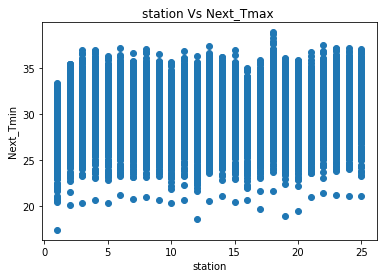

In [29]:
plt.scatter(temp['station'],temp['Next_Tmax'])
plt.xlabel("station")
plt.ylabel('Next_Tmin')
plt.title("station Vs Next_Tmax ")

Text(0.5, 1.0, 'Present_Tmax Vs Next_Tmax ')

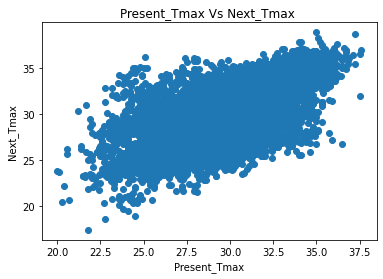

In [30]:
plt.scatter(temp['Present_Tmax'],temp['Next_Tmax'])
plt.xlabel("Present_Tmax")
plt.ylabel('Next_Tmax')
plt.title("Present_Tmax Vs Next_Tmax ")

Text(0.5, 1.0, 'Present_Tmax Vs Next_Tmin ')

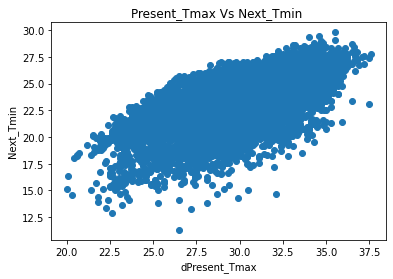

In [31]:
plt.scatter(temp['Present_Tmax'],temp['Next_Tmin'])
plt.xlabel("dPresent_Tmax")
plt.ylabel('Next_Tmin')
plt.title("Present_Tmax Vs Next_Tmin ")

Text(0.5, 1.0, 'Present_Tmin Vs Next_Tmax ')

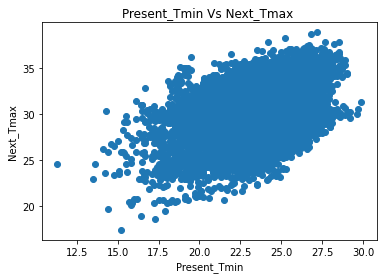

In [32]:
plt.scatter(temp['Present_Tmin'],temp['Next_Tmax'])
plt.xlabel("Present_Tmin")
plt.ylabel('Next_Tmax')
plt.title("Present_Tmin Vs Next_Tmax ")

Text(0.5, 1.0, 'Present_Tmin Vs Next_Tmin ')

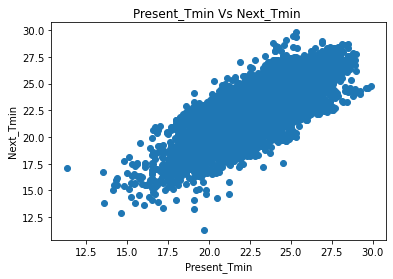

In [33]:
plt.scatter(temp['Present_Tmin'],temp['Next_Tmin'])
plt.xlabel("Present_Tmin")
plt.ylabel('Next_Tmin')
plt.title("Present_Tmin Vs Next_Tmin ")

Text(0.5, 1.0, 'LDAPS_RHmin Vs Next_Tmax ')

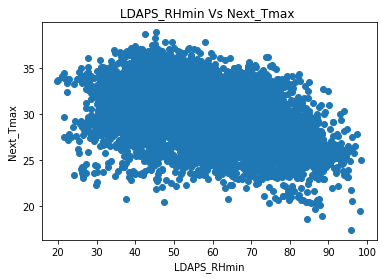

In [34]:
plt.scatter(temp['LDAPS_RHmin'],temp['Next_Tmax'])
plt.xlabel("LDAPS_RHmin")
plt.ylabel('Next_Tmax')
plt.title("LDAPS_RHmin Vs Next_Tmax ")

Text(0.5, 1.0, 'LDAPS_RHmin Vs Next_Tmin ')

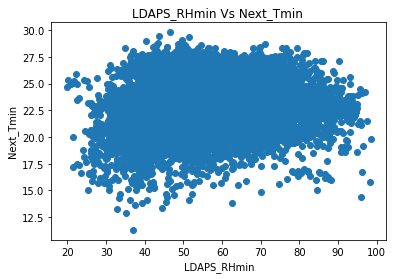

In [35]:
plt.scatter(temp['LDAPS_RHmin'],temp['Next_Tmin'])
plt.xlabel("LDAPS_RHmin")
plt.ylabel('Next_Tmin')
plt.title("LDAPS_RHmin Vs Next_Tmin ")

Text(0.5, 1.0, 'LDAPS_RHmax Vs Next_Tmax ')

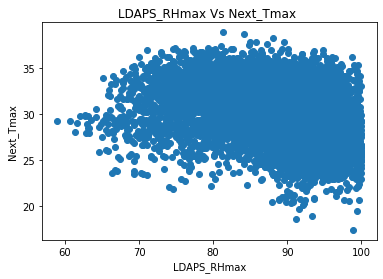

In [36]:
plt.scatter(temp['LDAPS_RHmax'],temp['Next_Tmax'])
plt.xlabel("LDAPS_RHmax")
plt.ylabel('Next_Tmax')
plt.title("LDAPS_RHmax Vs Next_Tmax ")

Text(0.5, 1.0, 'LDAPS_RHmax Vs Next_Tmin ')

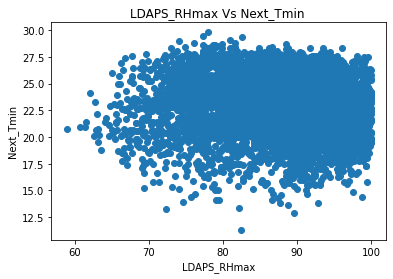

In [37]:
plt.scatter(temp['LDAPS_RHmax'],temp['Next_Tmin'])
plt.xlabel("LDAPS_RHmax")
plt.ylabel('Next_Tmin')
plt.title("LDAPS_RHmax Vs Next_Tmin ")

Text(0.5, 1.0, 'LDAPS_Tmax_lapse Vs Next_Tmax ')

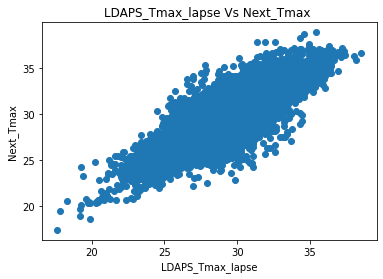

In [38]:
plt.scatter(temp['LDAPS_Tmax_lapse'],temp['Next_Tmax'])
plt.xlabel("LDAPS_Tmax_lapse")
plt.ylabel('Next_Tmax')
plt.title("LDAPS_Tmax_lapse Vs Next_Tmax ")

Text(0.5, 1.0, 'LDAPS_Tmax_lapse Vs Next_Tmin ')

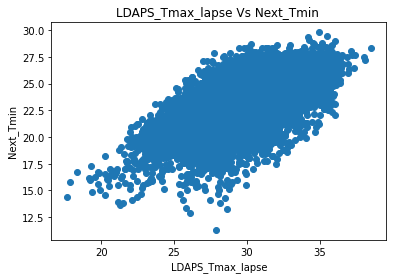

In [39]:
plt.scatter(temp['LDAPS_Tmax_lapse'],temp['Next_Tmin'])
plt.xlabel("LDAPS_Tmax_lapse")
plt.ylabel('Next_Tmin')
plt.title("LDAPS_Tmax_lapse Vs Next_Tmin ")

Text(0.5, 1.0, 'LDAPS_Tmin_lapse Vs Next_Tmax ')

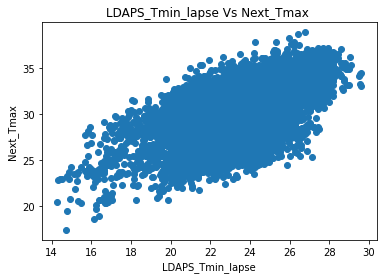

In [40]:
plt.scatter(temp['LDAPS_Tmin_lapse'],temp['Next_Tmax'])
plt.xlabel("LDAPS_Tmin_lapse")
plt.ylabel('Next_Tmax')
plt.title("LDAPS_Tmin_lapse Vs Next_Tmax ")

Text(0.5, 1.0, 'LDAPS_Tmin_lapse Vs Next_Tmin ')

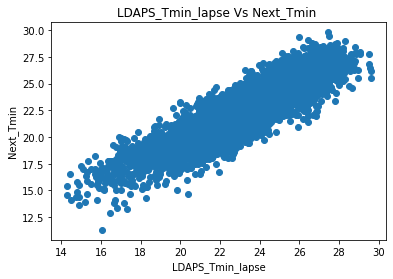

In [41]:
plt.scatter(temp['LDAPS_Tmin_lapse'],temp['Next_Tmin'])
plt.xlabel("LDAPS_Tmin_lapse")
plt.ylabel('Next_Tmin')
plt.title("LDAPS_Tmin_lapse Vs Next_Tmin ")

Text(0.5, 1.0, 'LDAPS_WS Vs Next_Tmax ')

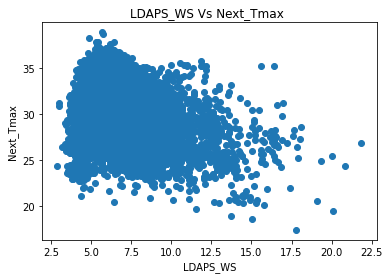

In [42]:
plt.scatter(temp['LDAPS_WS'],temp['Next_Tmax'])
plt.xlabel("LDAPS_WS")
plt.ylabel('Next_Tmax')
plt.title("LDAPS_WS Vs Next_Tmax ")

Text(0.5, 1.0, 'LDAPS_WS Vs Next_Tmin ')

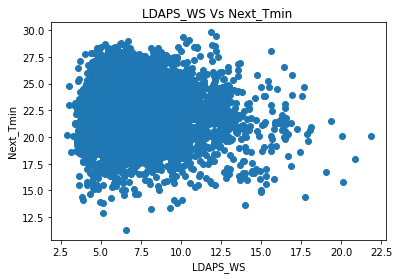

In [43]:
plt.scatter(temp['LDAPS_WS'],temp['Next_Tmin'])
plt.xlabel("LDAPS_WS")
plt.ylabel('Next_Tmin')
plt.title("LDAPS_WS Vs Next_Tmin ")

Text(0.5, 1.0, 'LDAPS_LH Vs Next_Tmax ')

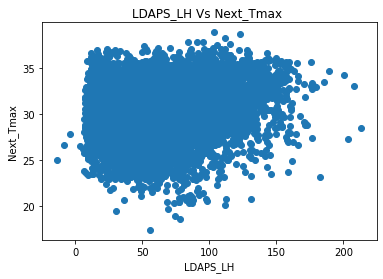

In [44]:
plt.scatter(temp['LDAPS_LH'],temp['Next_Tmax'])
plt.xlabel("LDAPS_LH")
plt.ylabel('Next_Tmax')
plt.title("LDAPS_LH Vs Next_Tmax ")

Text(0.5, 1.0, 'LDAPS_LH Vs Next_Tmin ')

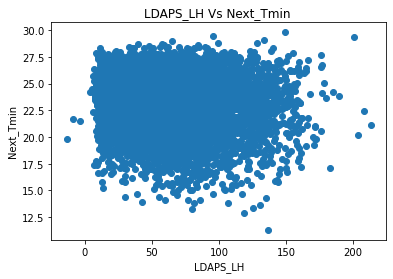

In [45]:
plt.scatter(temp['LDAPS_LH'],temp['Next_Tmin'])
plt.xlabel("LDAPS_LH")
plt.ylabel('Next_Tmin')
plt.title("LDAPS_LH Vs Next_Tmin ")

Text(0.5, 1.0, 'LDAPS_CC1 Vs Next_Tmax ')

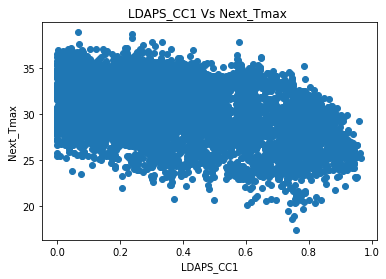

In [46]:
plt.scatter(temp['LDAPS_CC1'],temp['Next_Tmax'])
plt.xlabel("LDAPS_CC1")
plt.ylabel('Next_Tmax')
plt.title("LDAPS_CC1 Vs Next_Tmax ")

Text(0.5, 1.0, 'LDAPS_CC1 Vs Next_Tmin ')

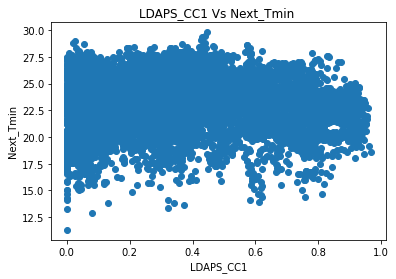

In [47]:
plt.scatter(temp['LDAPS_CC1'],temp['Next_Tmin'])
plt.xlabel("LDAPS_CC1")
plt.ylabel('Next_Tmin')
plt.title("LDAPS_CC1 Vs Next_Tmin ")

Text(0.5, 1.0, 'LDAPS_CC2 Vs Next_Tmax ')

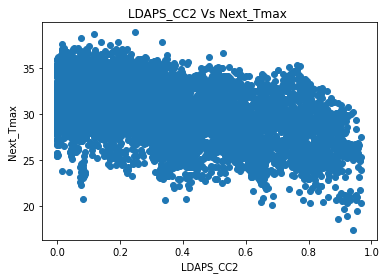

In [48]:
plt.scatter(temp['LDAPS_CC2'],temp['Next_Tmax'])
plt.xlabel("LDAPS_CC2")
plt.ylabel('Next_Tmax')
plt.title("LDAPS_CC2 Vs Next_Tmax ")

Text(0.5, 1.0, 'LDAPS_CC2 Vs Next_Tmin ')

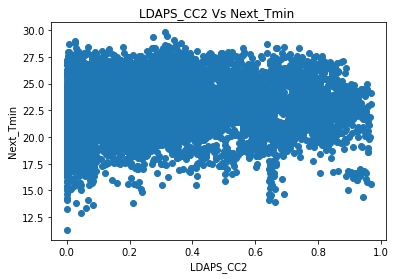

In [49]:
plt.scatter(temp['LDAPS_CC2'],temp['Next_Tmin'])
plt.xlabel("LDAPS_CC2")
plt.ylabel('Next_Tmin')
plt.title("LDAPS_CC2 Vs Next_Tmin ")

Text(0.5, 1.0, 'LDAPS_CC3 Vs Next_Tmax ')

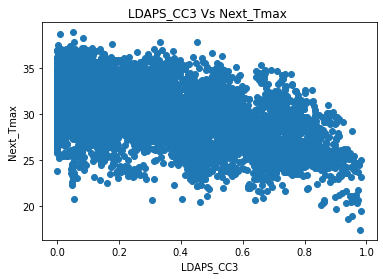

In [50]:
plt.scatter(temp['LDAPS_CC3'],temp['Next_Tmax'])
plt.xlabel("LDAPS_CC3")
plt.ylabel('Next_Tmax')
plt.title("LDAPS_CC3 Vs Next_Tmax ")

Text(0.5, 1.0, 'LDAPS_CC3 Vs Next_Tmin ')

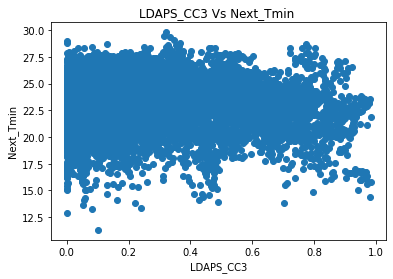

In [51]:
plt.scatter(temp['LDAPS_CC3'],temp['Next_Tmin'])
plt.xlabel("LDAPS_CC3")
plt.ylabel('Next_Tmin')
plt.title("LDAPS_CC3 Vs Next_Tmin ")

Text(0.5, 1.0, 'LDAPS_CC4 Vs Next_Tmax ')

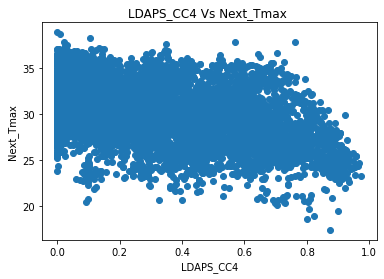

In [52]:
plt.scatter(temp['LDAPS_CC4'],temp['Next_Tmax'])
plt.xlabel("LDAPS_CC4")
plt.ylabel('Next_Tmax')
plt.title("LDAPS_CC4 Vs Next_Tmax ")

Text(0.5, 1.0, 'LDAPS_CC4 Vs Next_Tmin ')

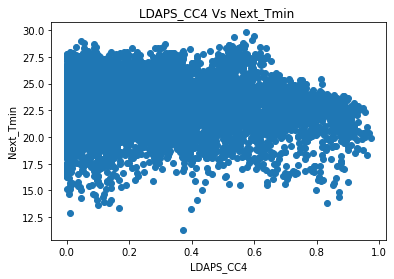

In [53]:
plt.scatter(temp['LDAPS_CC4'],temp['Next_Tmin'])
plt.xlabel("LDAPS_CC4")
plt.ylabel('Next_Tmin')
plt.title("LDAPS_CC4 Vs Next_Tmin ")

Text(0.5, 1.0, 'LDAPS_PPT1 Vs Next_Tmax ')

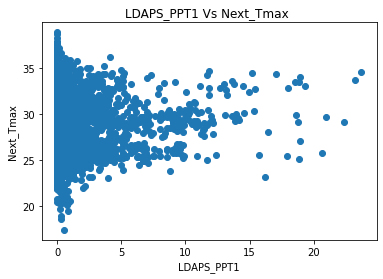

In [54]:
plt.scatter(temp['LDAPS_PPT1'],temp['Next_Tmax'])
plt.xlabel("LDAPS_PPT1")
plt.ylabel('Next_Tmax')
plt.title("LDAPS_PPT1 Vs Next_Tmax ")

Text(0.5, 1.0, 'LDAPS_PPT1 Vs Next_Tmin ')

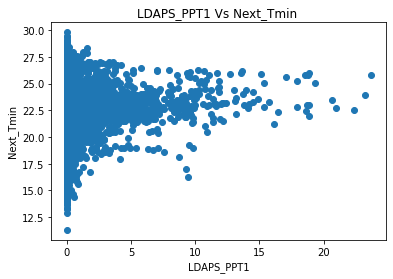

In [55]:
plt.scatter(temp['LDAPS_PPT1'],temp['Next_Tmin'])
plt.xlabel("LDAPS_PPT1")
plt.ylabel('Next_Tmin')
plt.title("LDAPS_PPT1 Vs Next_Tmin ")

Text(0.5, 1.0, 'LDAPS_PPT2 Vs Next_Tmax ')

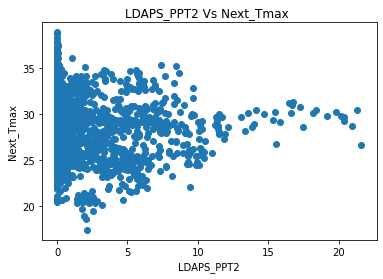

In [56]:
plt.scatter(temp['LDAPS_PPT2'],temp['Next_Tmax'])
plt.xlabel("LDAPS_PPT2")
plt.ylabel('Next_Tmax')
plt.title("LDAPS_PPT2 Vs Next_Tmax ")

Text(0.5, 1.0, 'LDAPS_PPT2 Vs Next_Tmin ')

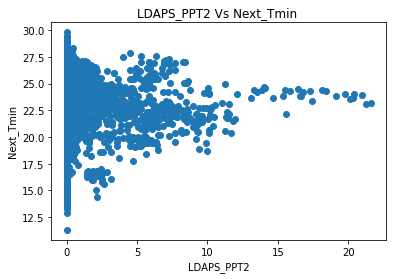

In [57]:
plt.scatter(temp['LDAPS_PPT2'],temp['Next_Tmin'])
plt.xlabel("LDAPS_PPT2")
plt.ylabel('Next_Tmin')
plt.title("LDAPS_PPT2 Vs Next_Tmin ")

Text(0.5, 1.0, 'LDAPS_PPT3 Vs Next_Tmax ')

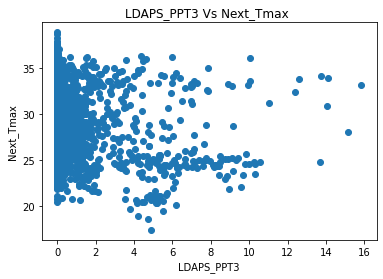

In [58]:
plt.scatter(temp['LDAPS_PPT3'],temp['Next_Tmax'])
plt.xlabel("LDAPS_PPT3")
plt.ylabel('Next_Tmax')
plt.title("LDAPS_PPT3 Vs Next_Tmax ")

Text(0.5, 1.0, 'LDAPS_PPT3 Vs Next_Tmin ')

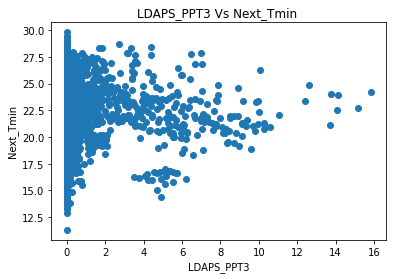

In [59]:
plt.scatter(temp['LDAPS_PPT3'],temp['Next_Tmin'])
plt.xlabel("LDAPS_PPT3")
plt.ylabel('Next_Tmin')
plt.title("LDAPS_PPT3 Vs Next_Tmin ")

Text(0.5, 1.0, 'LDAPS_PPT4 Vs Next_Tmax ')

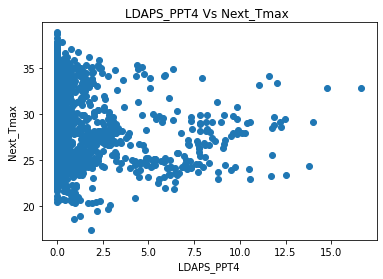

In [60]:
plt.scatter(temp['LDAPS_PPT4'],temp['Next_Tmax'])
plt.xlabel("LDAPS_PPT4")
plt.ylabel('Next_Tmax')
plt.title("LDAPS_PPT4 Vs Next_Tmax ")

Text(0.5, 1.0, 'LDAPS_PPT4 Vs Next_Tmin ')

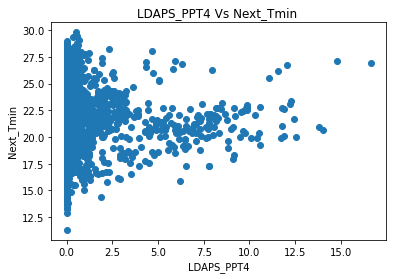

In [61]:
plt.scatter(temp['LDAPS_PPT4'],temp['Next_Tmin'])
plt.xlabel("LDAPS_PPT4")
plt.ylabel('Next_Tmin')
plt.title("LDAPS_PPT4 Vs Next_Tmin ")

Text(0.5, 1.0, 'lat Vs Next_Tmax ')

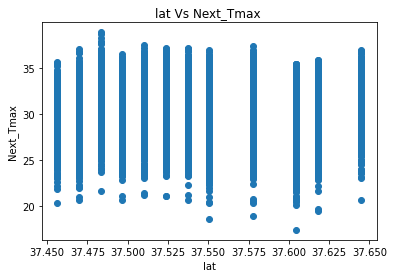

In [62]:
plt.scatter(temp['lat'],temp['Next_Tmax'])
plt.xlabel("lat")
plt.ylabel('Next_Tmax')
plt.title("lat Vs Next_Tmax ")

Text(0.5, 1.0, 'lat Vs Next_Tmin ')

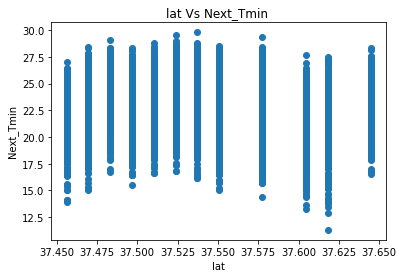

In [63]:
plt.scatter(temp['lat'],temp['Next_Tmin'])
plt.xlabel("lat")
plt.ylabel('Next_Tmin')
plt.title("lat Vs Next_Tmin ")

Text(0.5, 1.0, 'lon Vs Next_Tmax ')

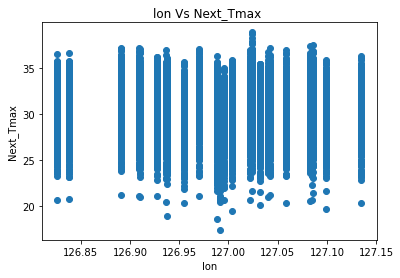

In [64]:
plt.scatter(temp['lon'],temp['Next_Tmax'])
plt.xlabel("lon")
plt.ylabel('Next_Tmax')
plt.title("lon Vs Next_Tmax ")

Text(0.5, 1.0, 'lon Vs Next_Tmin ')

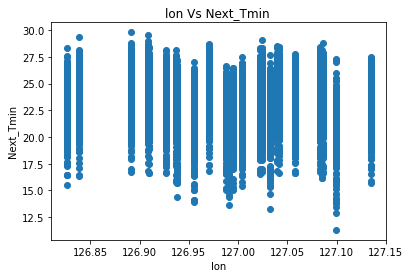

In [65]:
plt.scatter(temp['lon'],temp['Next_Tmin'])
plt.xlabel("lon")
plt.ylabel('Next_Tmin')
plt.title("lon Vs Next_Tmin ")

Text(0.5, 1.0, 'DEM Vs Next_Tmax ')

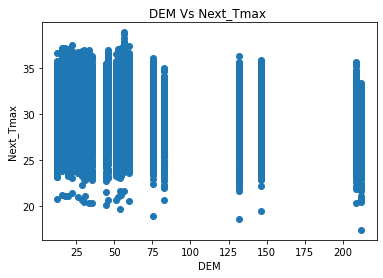

In [66]:
plt.scatter(temp['DEM'],temp['Next_Tmax'])
plt.xlabel("DEM")
plt.ylabel('Next_Tmax')
plt.title("DEM Vs Next_Tmax ")

Text(0.5, 1.0, 'DEM Vs Next_Tmin ')

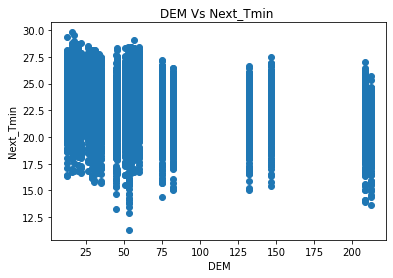

In [67]:
plt.scatter(temp['DEM'],temp['Next_Tmin'])
plt.xlabel("DEM")
plt.ylabel('Next_Tmin')
plt.title("DEM Vs Next_Tmin ")

Text(0.5, 1.0, 'Slope Vs Next_Tmax ')

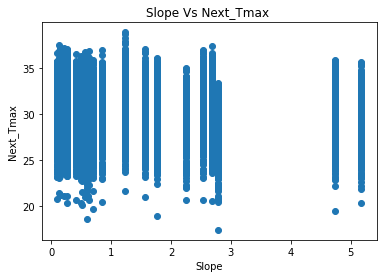

In [68]:
plt.scatter(temp['Slope'],temp['Next_Tmax'])
plt.xlabel("Slope")
plt.ylabel('Next_Tmax')
plt.title("Slope Vs Next_Tmax ")

Text(0.5, 1.0, 'Slope Vs Next_Tmin ')

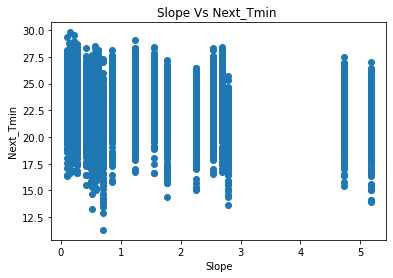

In [69]:
plt.scatter(temp['Slope'],temp['Next_Tmin'])
plt.xlabel("Slope")
plt.ylabel('Next_Tmin')
plt.title("Slope Vs Next_Tmin ")

Text(0.5, 1.0, "Solar radiation Vs 'Next_Tmax ")

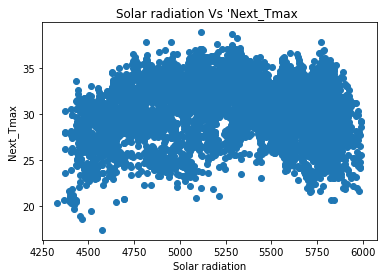

In [70]:
plt.scatter(temp['Solar radiation'],temp['Next_Tmax'])
plt.xlabel("Solar radiation")
plt.ylabel('Next_Tmax')
plt.title("Solar radiation Vs 'Next_Tmax ")

Text(0.5, 1.0, 'Solar radiation Vs Next_Tmin ')

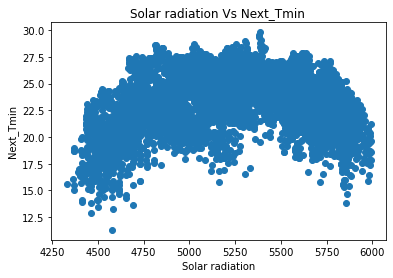

In [71]:
plt.scatter(temp['Solar radiation'],temp['Next_Tmin'])
plt.xlabel("Solar radiation")
plt.ylabel('Next_Tmin')
plt.title("Solar radiation Vs Next_Tmin ")

Text(0.5, 1.0, "month' VsNext_Tmax ")

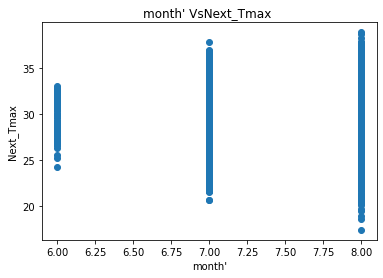

In [72]:
plt.scatter(temp['month'],temp['Next_Tmax'])
plt.xlabel("month'")
plt.ylabel('Next_Tmax')
plt.title("month' VsNext_Tmax ")

Text(0.5, 1.0, 'month Vs Next_Tmin ')

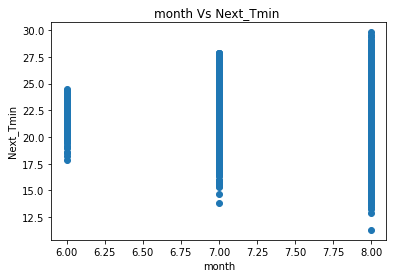

In [73]:
plt.scatter(temp['month'],temp['Next_Tmin'])
plt.xlabel("month")
plt.ylabel('Next_Tmin')
plt.title("month Vs Next_Tmin ")

Text(0.5, 1.0, 'date Vs Next_Tmax ')

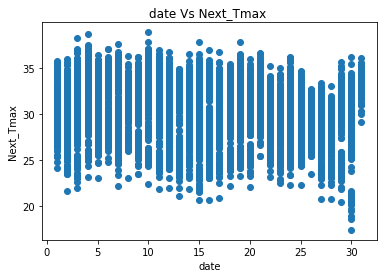

In [74]:
plt.scatter(temp['date'],temp['Next_Tmax'])
plt.xlabel("date")
plt.ylabel('Next_Tmax')
plt.title("date Vs Next_Tmax ")

Text(0.5, 1.0, 'date Vs Next_Tmin ')

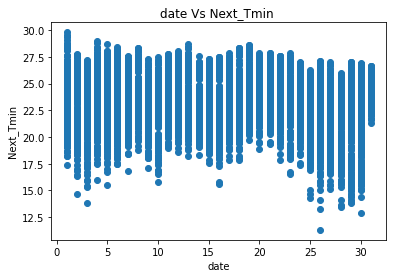

In [75]:
plt.scatter(temp['date'],temp['Next_Tmin'])
plt.xlabel("date")
plt.ylabel('Next_Tmin')
plt.title("date Vs Next_Tmin ")

# Multivariate Analysis

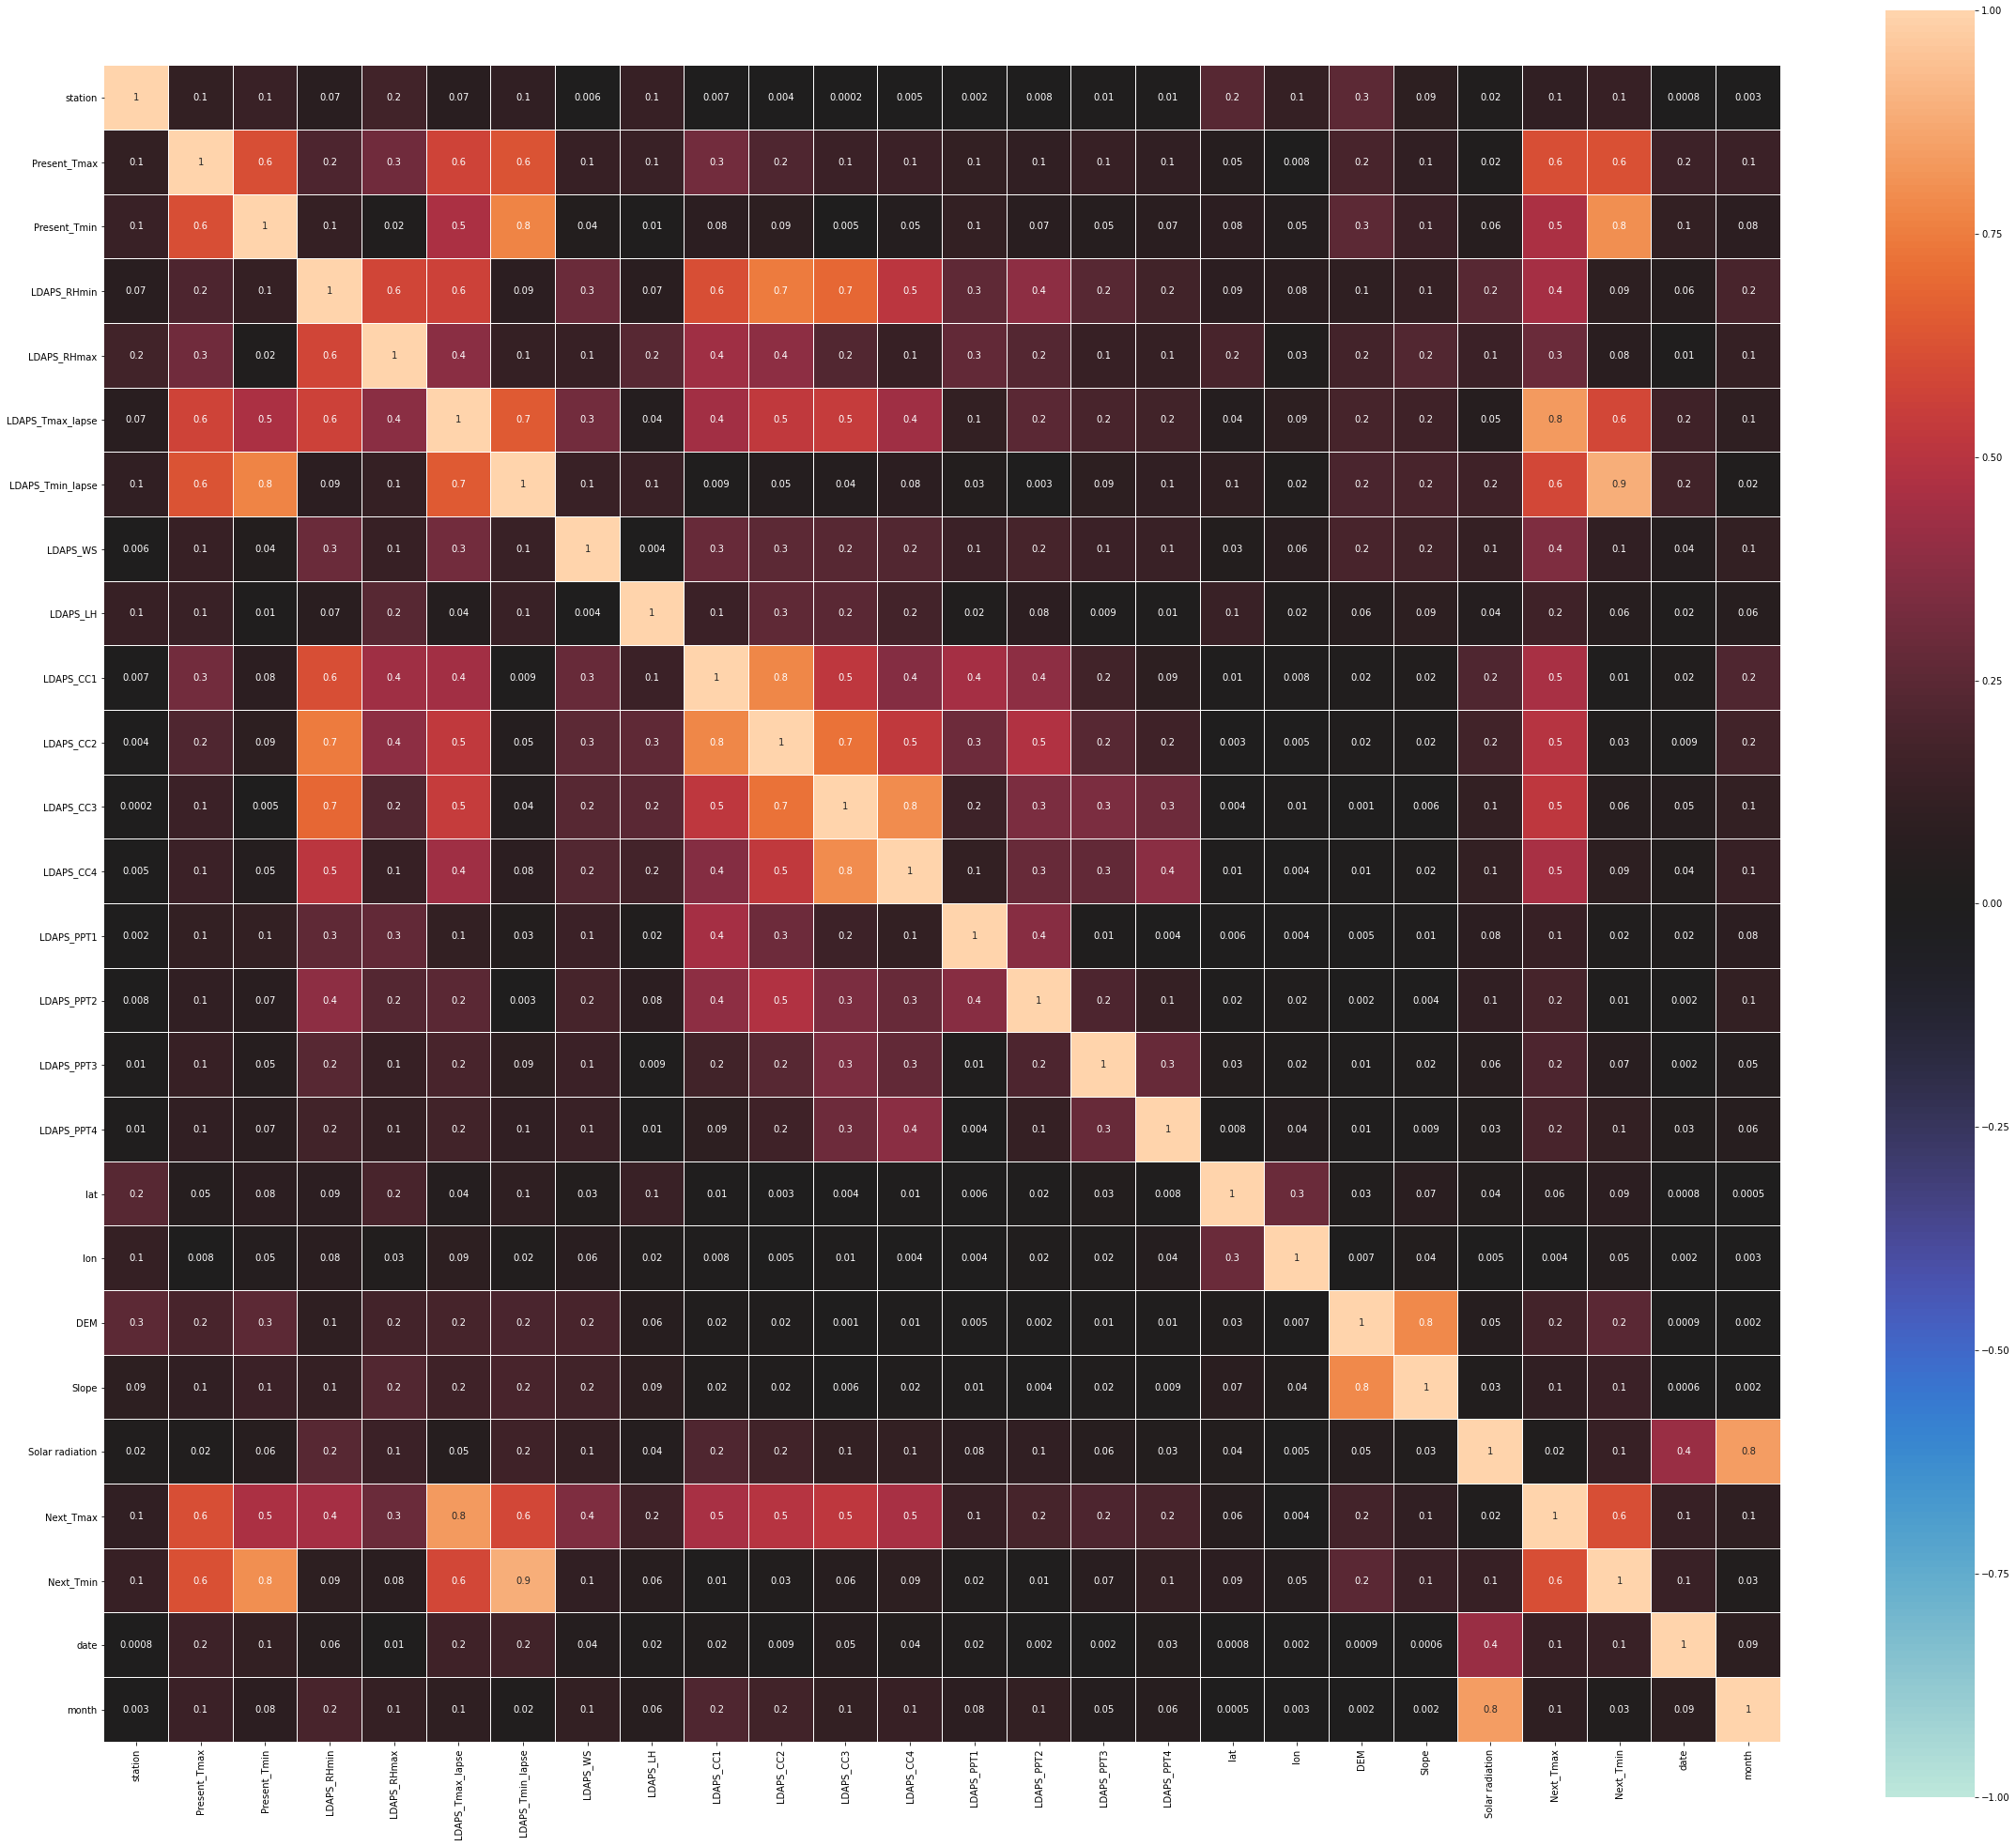

In [76]:
# lets plot heatmap which is multivaraiate analysis,find the coeffient of multicollinearity
df_corr=temp.corr().abs()
plt.figure(figsize=(40,35))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.1g',linewidth=.1)
plt.show()

In [77]:
corr_matrix=temp.corr()   # here we get values of correlation in descending order
corr_matrix['Next_Tmax'].sort_values(ascending=False)

Next_Tmax           1.000000
LDAPS_Tmax_lapse    0.835729
Next_Tmin           0.616629
Present_Tmax        0.610357
LDAPS_Tmin_lapse    0.592119
Present_Tmin        0.463523
LDAPS_LH            0.156779
station             0.107747
month               0.096811
Solar radiation     0.016145
lon                 0.003502
lat                -0.055367
Slope              -0.104279
LDAPS_PPT1         -0.125954
date               -0.127060
DEM                -0.174578
LDAPS_PPT2         -0.186722
LDAPS_PPT4         -0.190720
LDAPS_PPT3         -0.203554
LDAPS_RHmax        -0.289788
LDAPS_WS           -0.351107
LDAPS_RHmin        -0.446824
LDAPS_CC4          -0.454039
LDAPS_CC1          -0.459705
LDAPS_CC2          -0.498295
LDAPS_CC3          -0.523061
Name: Next_Tmax, dtype: float64

first value 1 shows relation between label verses label, so ignore it. the value of correation ranges between -1 to +1, 1 shows strong positive correlation between variable,it means if one variable increses other also increase,-1 represent strong negative correlation between variable,it means if one variable value increase other goes on decreasing, value 0 or near to 0 represents no correlation between variable,the feature "year","solar radiation","lon" shows less correlation

In [78]:
corr_matrix=temp.corr()   # here we get values of correlation in descending order
corr_matrix['Next_Tmin'].sort_values(ascending=False)

Next_Tmin           1.000000
LDAPS_Tmin_lapse    0.886513
Present_Tmin        0.796975
Present_Tmax        0.621048
Next_Tmax           0.616629
LDAPS_Tmax_lapse    0.589963
station             0.128184
Solar radiation     0.125517
LDAPS_RHmin         0.093249
month               0.030379
LDAPS_CC2           0.030358
LDAPS_PPT1          0.018031
LDAPS_PPT2         -0.012462
LDAPS_CC1          -0.012877
lon                -0.045758
LDAPS_CC3          -0.056490
LDAPS_LH           -0.060392
LDAPS_PPT3         -0.068664
LDAPS_RHmax        -0.076415
lat                -0.085136
LDAPS_CC4          -0.086197
LDAPS_WS           -0.102021
LDAPS_PPT4         -0.114900
date               -0.134284
Slope              -0.148379
DEM                -0.249303
Name: Next_Tmin, dtype: float64

first value 1 shows relation between label verses label, so ignore it. the value of correation ranges between -1 to +1, 1 shows strong positive correlation between variable,it means if one variable increses other also increase,-1 represent strong negative correlation between variable,it means if one variable value increase other goes on decreasing, value 0 or near to 0 represents no correlation between variable,for label "LDAPS_PPT2",'LDAPS_CC1","lon","LDAPS_CC3","LDAPS_LH","LDAPS_PPT3" shows less correlation.


In [79]:
temp.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'date', 'month'],
      dtype='object')

In [80]:
temp_1=temp.drop(columns=['Next_Tmax','Next_Tmin','date','month'],axis=1)

In [81]:
temp_2=temp.drop(columns=['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax','LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH','LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1','LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope','Solar radiation'],axis=1)

In [82]:
temp_1.shape

(7588, 22)

In [83]:
temp_2.shape

(7588, 4)

# Univariate Analysis

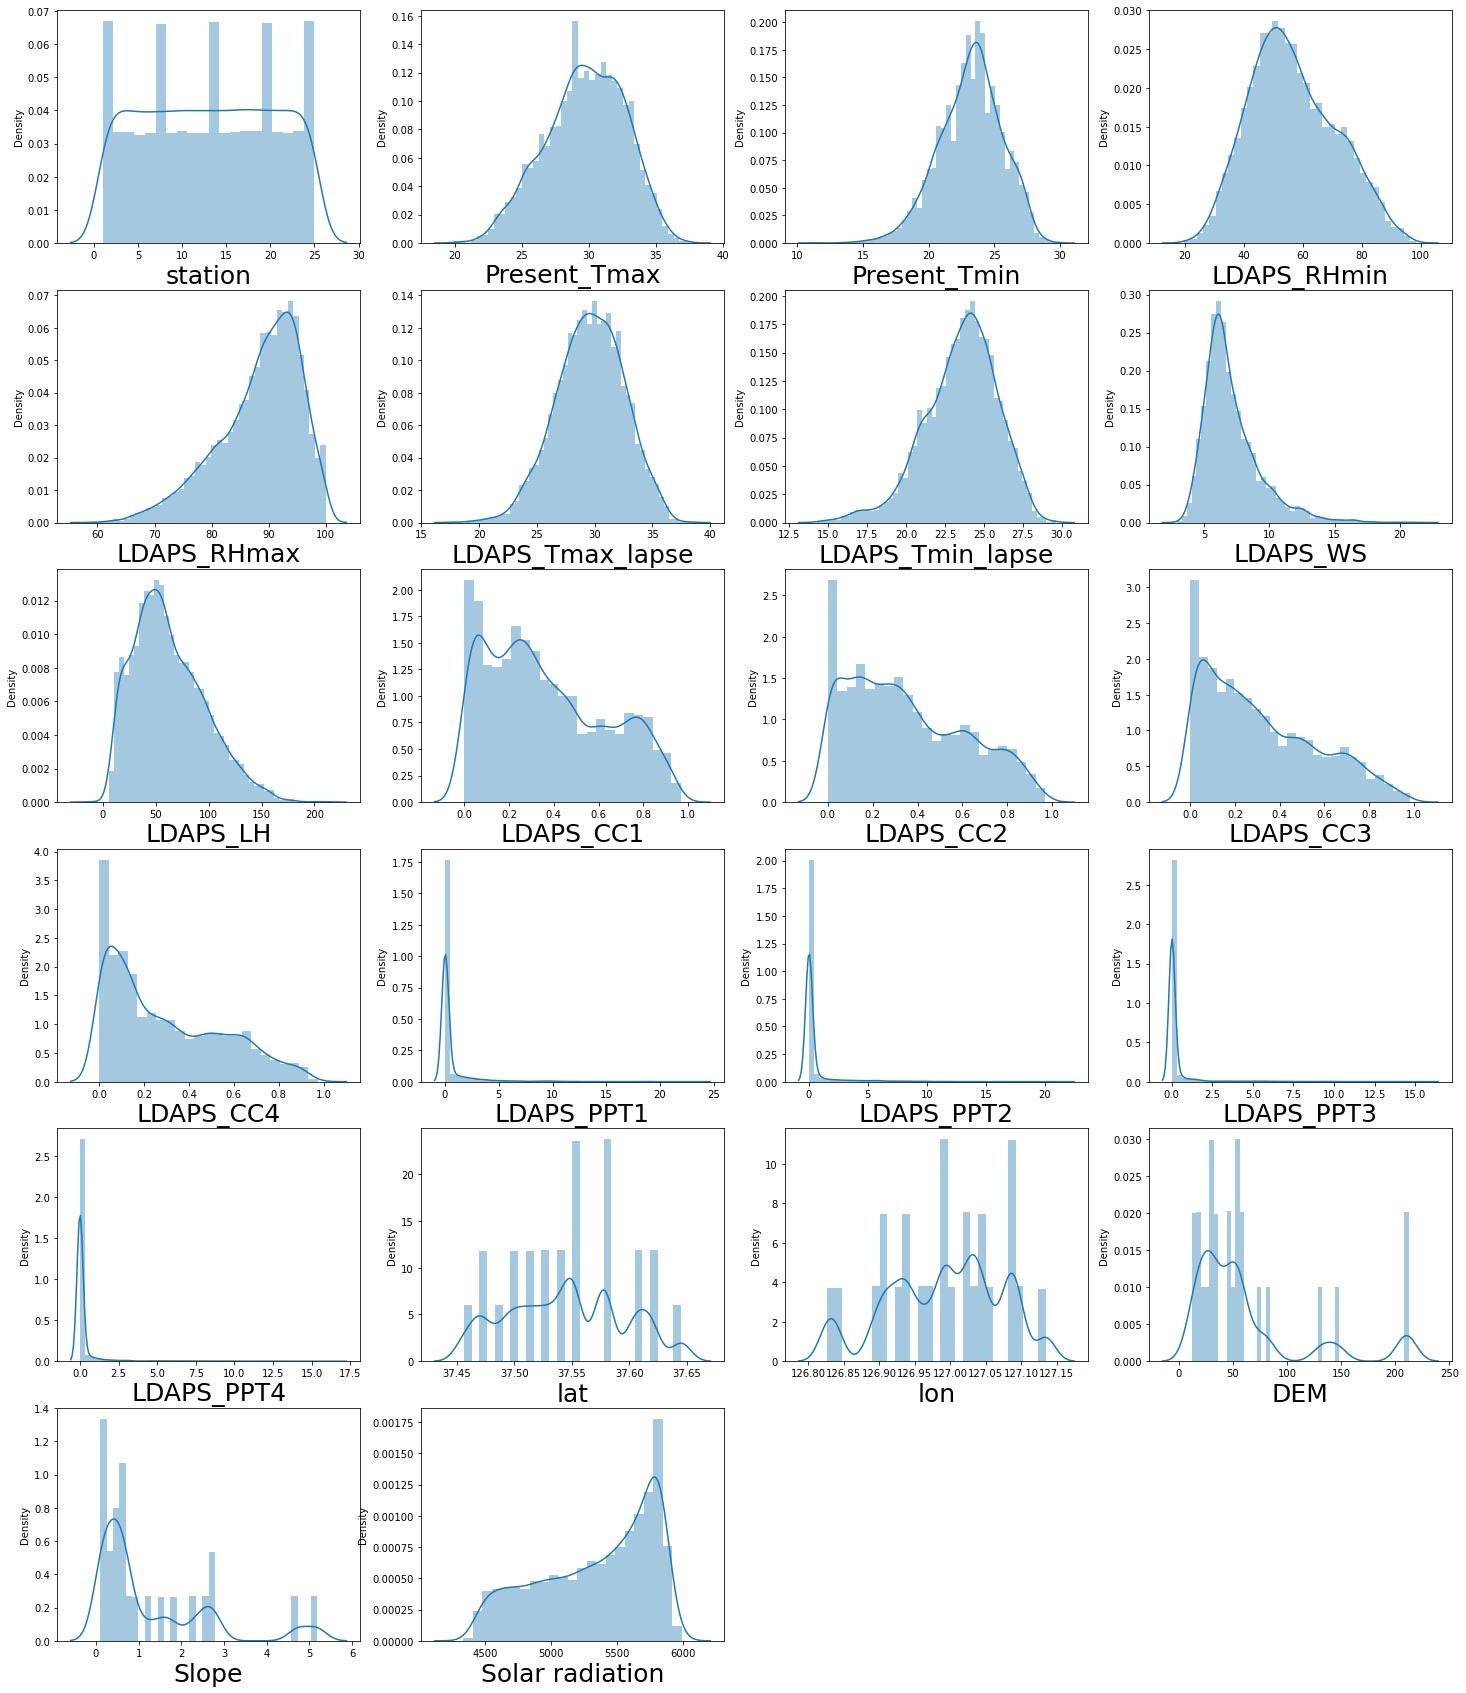

In [84]:
plt.figure(figsize=(25,30))   # here we give row and column wise dimension
plotnumber=1  # initially plotnumber is set to 1
for column in temp_1 :  #  we pass every column of dataframe into for loop
    if plotnumber<=22: # maximmum plotnumber is 3
        plt.subplot(6,4,plotnumber) # we plot all distplot in 1row and in 3 columns
        ax=sns.distplot(temp_1[column]) # we plot distribution plot for every column
        plt.xlabel(column,fontsize=25)# assign column name to each x axis
    plotnumber+=1 # plotnumber is incremented by 1
plt.show() # display graph

station                AxesSubplot(0.125,0.799681;0.227941x0.0803191)
Present_Tmax        AxesSubplot(0.398529,0.799681;0.227941x0.0803191)
Present_Tmin        AxesSubplot(0.672059,0.799681;0.227941x0.0803191)
LDAPS_RHmin            AxesSubplot(0.125,0.703298;0.227941x0.0803191)
LDAPS_RHmax         AxesSubplot(0.398529,0.703298;0.227941x0.0803191)
LDAPS_Tmax_lapse    AxesSubplot(0.672059,0.703298;0.227941x0.0803191)
LDAPS_Tmin_lapse       AxesSubplot(0.125,0.606915;0.227941x0.0803191)
LDAPS_WS            AxesSubplot(0.398529,0.606915;0.227941x0.0803191)
LDAPS_LH            AxesSubplot(0.672059,0.606915;0.227941x0.0803191)
LDAPS_CC1              AxesSubplot(0.125,0.510532;0.227941x0.0803191)
LDAPS_CC2           AxesSubplot(0.398529,0.510532;0.227941x0.0803191)
LDAPS_CC3           AxesSubplot(0.672059,0.510532;0.227941x0.0803191)
LDAPS_CC4              AxesSubplot(0.125,0.414149;0.227941x0.0803191)
LDAPS_PPT1          AxesSubplot(0.398529,0.414149;0.227941x0.0803191)
LDAPS_PPT2          

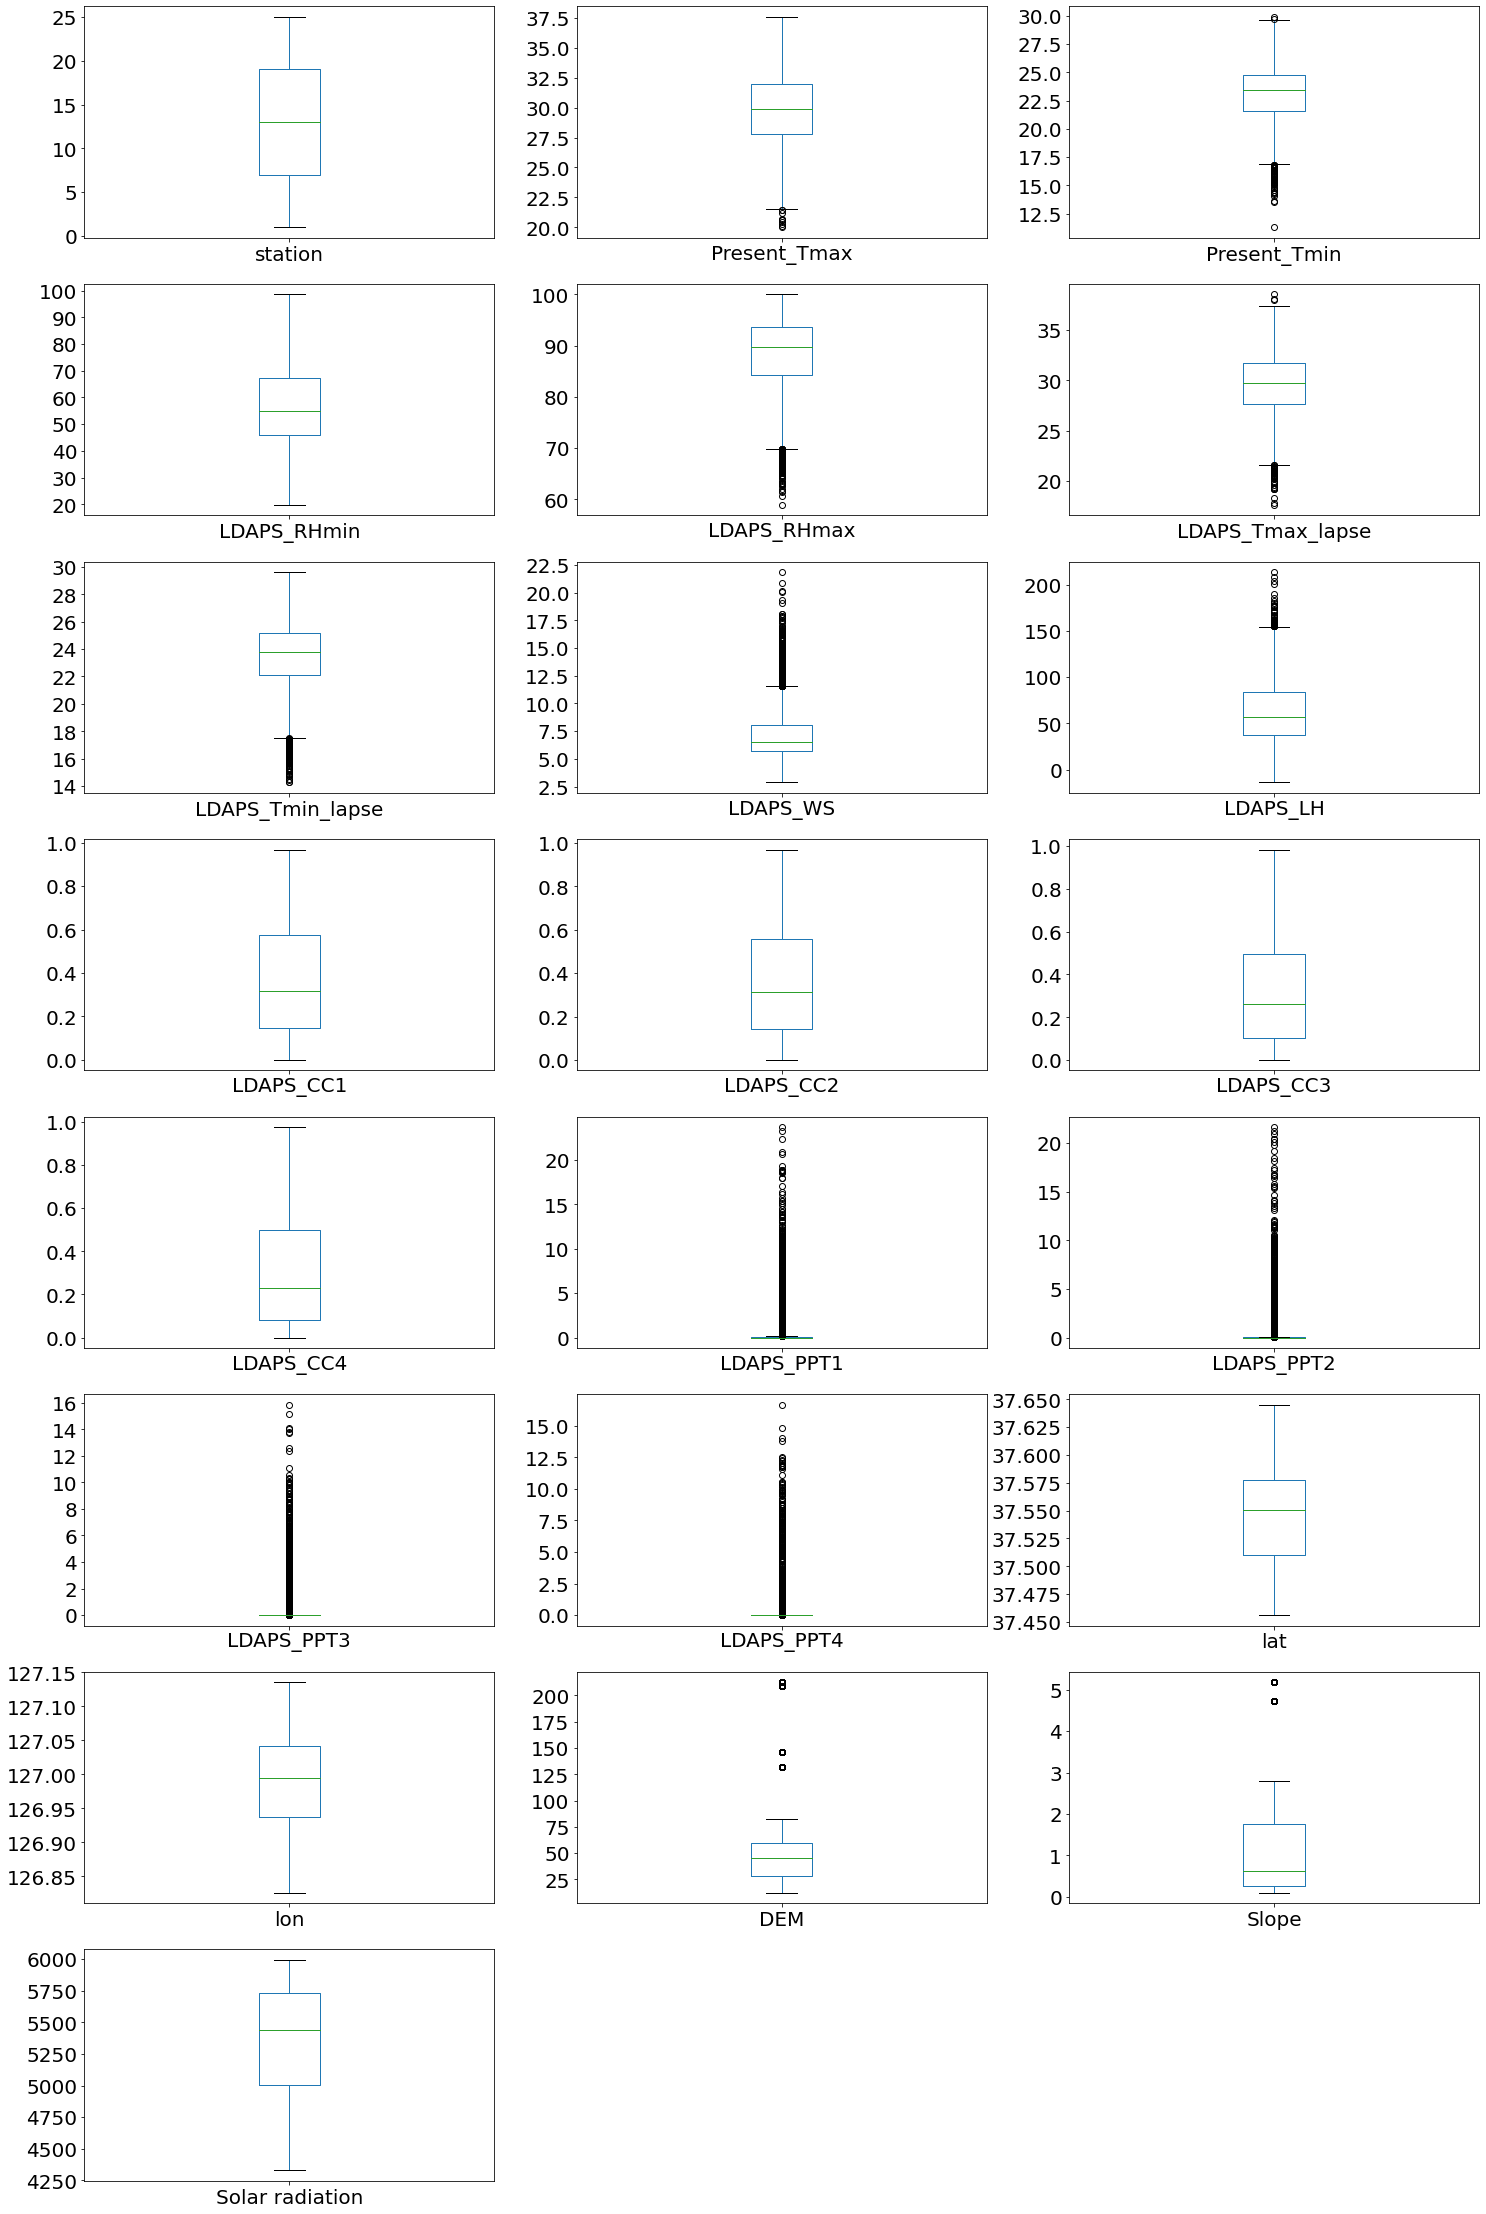

In [85]:
temp_1.plot(kind="box",subplots=True,figsize=(25,40),layout=(8,3),fontsize=20)

# IQR to remove Outliers

In [88]:
#find the IQR(Inter Quartile Range) to identify outliers
# 1st Quartile
q1=temp_1.quantile(0.04)
# 3 rd Quartile
q3=temp_1.quantile(0.96)
iqr=q3-q1
#Outlier detection formula
higher=q3+(1.5*iqr)  # uppar bound
lower=q1-(1.5*iqr)  # lower bound

In [89]:
temp_11 = temp_1[~((temp_1 < (lower)) |(temp_1 > (higher))).any(axis=1)]

In [90]:
temp_11.shape

(7230, 22)

In [91]:
7230/7752

0.9326625386996904

station                AxesSubplot(0.125,0.799681;0.227941x0.0803191)
Present_Tmax        AxesSubplot(0.398529,0.799681;0.227941x0.0803191)
Present_Tmin        AxesSubplot(0.672059,0.799681;0.227941x0.0803191)
LDAPS_RHmin            AxesSubplot(0.125,0.703298;0.227941x0.0803191)
LDAPS_RHmax         AxesSubplot(0.398529,0.703298;0.227941x0.0803191)
LDAPS_Tmax_lapse    AxesSubplot(0.672059,0.703298;0.227941x0.0803191)
LDAPS_Tmin_lapse       AxesSubplot(0.125,0.606915;0.227941x0.0803191)
LDAPS_WS            AxesSubplot(0.398529,0.606915;0.227941x0.0803191)
LDAPS_LH            AxesSubplot(0.672059,0.606915;0.227941x0.0803191)
LDAPS_CC1              AxesSubplot(0.125,0.510532;0.227941x0.0803191)
LDAPS_CC2           AxesSubplot(0.398529,0.510532;0.227941x0.0803191)
LDAPS_CC3           AxesSubplot(0.672059,0.510532;0.227941x0.0803191)
LDAPS_CC4              AxesSubplot(0.125,0.414149;0.227941x0.0803191)
LDAPS_PPT1          AxesSubplot(0.398529,0.414149;0.227941x0.0803191)
LDAPS_PPT2          

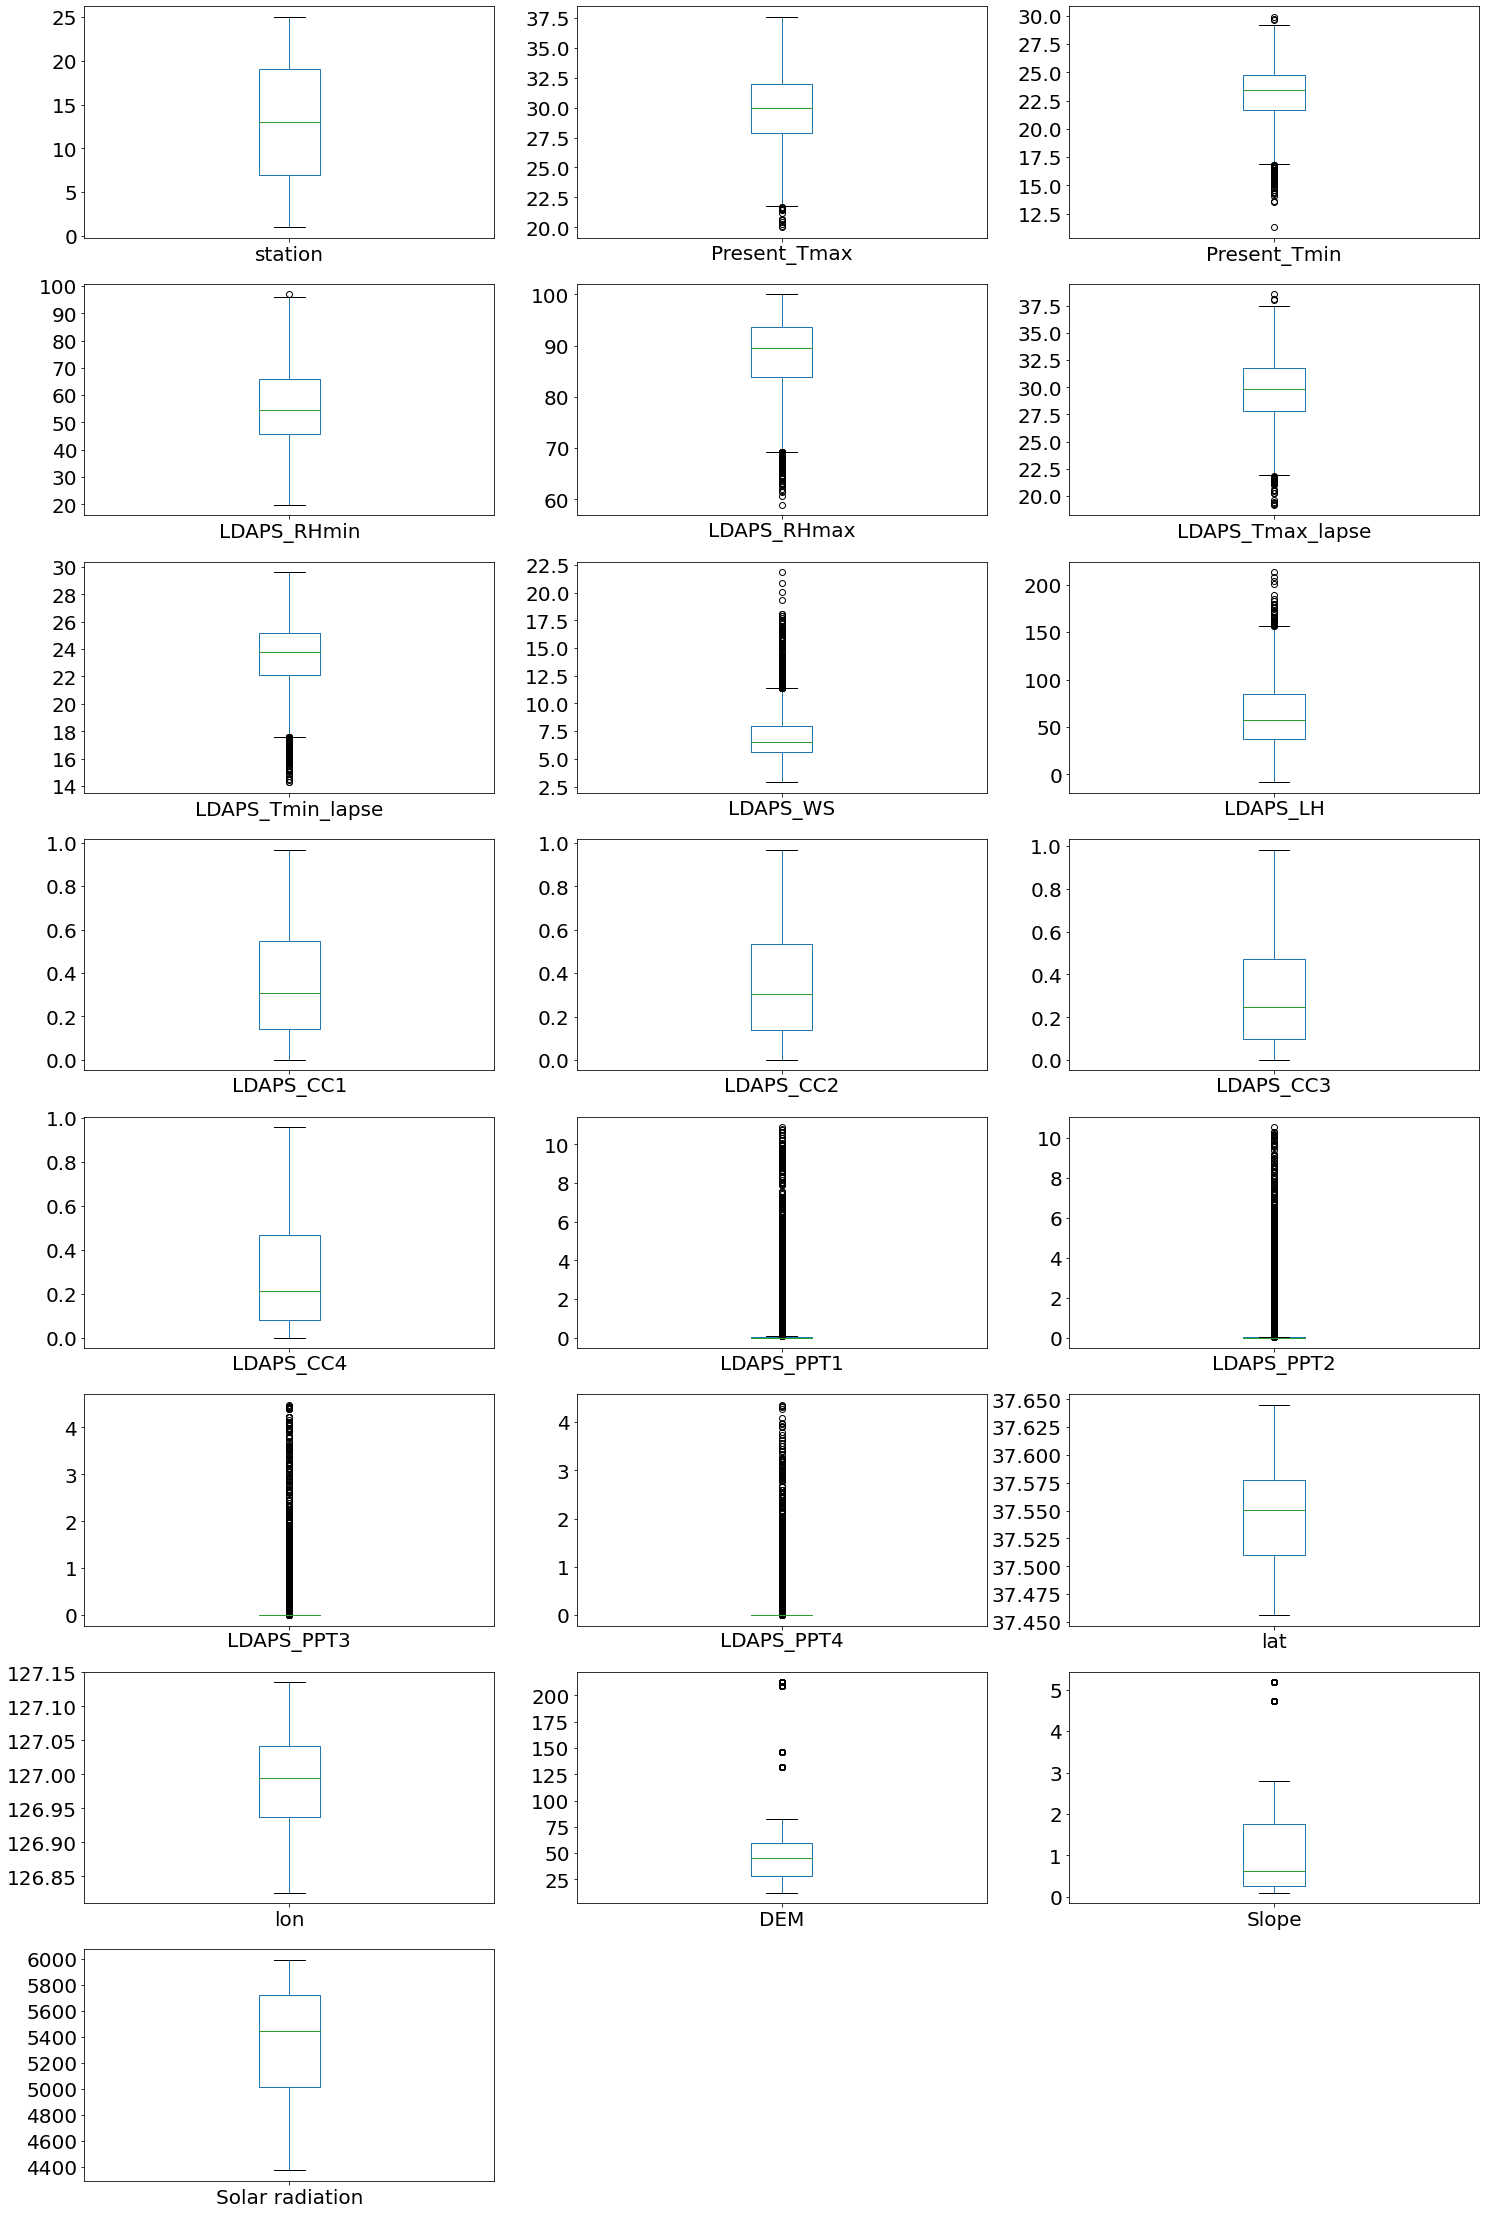

In [92]:
temp_11.plot(kind="box",subplots=True,figsize=(25,40),layout=(8,3),fontsize=20)

In [93]:
temp_11.skew()

station            -0.005358
Present_Tmax       -0.296973
Present_Tmin       -0.365333
LDAPS_RHmin         0.324702
LDAPS_RHmax        -0.807795
LDAPS_Tmax_lapse   -0.176205
LDAPS_Tmin_lapse   -0.569894
LDAPS_WS            1.555487
LDAPS_LH            0.653672
LDAPS_CC1           0.512856
LDAPS_CC2           0.490898
LDAPS_CC3           0.682923
LDAPS_CC4           0.694177
LDAPS_PPT1          4.252407
LDAPS_PPT2          4.799408
LDAPS_PPT3          5.533753
LDAPS_PPT4          5.731094
lat                 0.090014
lon                -0.281515
DEM                 1.718666
Slope               1.564046
Solar radiation    -0.541382
dtype: float64

skewness range is in between -0.5 to +0.5, in dataset temp_2 after removing outlier, some feature  shows skewness, features like 'LDAPS_RHmax',"LDAPS_Tmax_lapse","LDAPS_Tmin_lapse","LDAPS_WS","LDAPS_LH","LDAPS_CC1","LDAPS_CC3","LDAPS_CC4","LDAPS_PPT1","LDAPS_PPT2","LDAPS_PPT3","LDAPS_PPT4","DEM","slope" shows skewness

In [94]:
temp_11.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
count,7230.000000,7230.000000,7230.000000,7230.000000,7230.000000,7230.000000,7230.000000,7230.000000,7230.000000,7230.000000,...,7230.000000,7230.000000,7230.000000,7230.000000,7230.000000,7230.000000,7230.000000,7230.000000,7230.000000,7230.000000
mean,13.032365,29.839986,23.214620,56.053093,88.126423,29.730107,23.551397,7.030341,62.537588,0.359384,...,0.281698,0.454981,0.347574,0.127691,0.102180,37.544625,126.991000,61.902485,1.257696,5344.998767
std,7.213907,2.942927,2.399864,14.359876,7.242141,2.855850,2.330809,2.132077,34.106082,0.259016,...,0.240670,1.367909,1.241678,0.480221,0.415670,0.050325,0.079307,54.334770,1.371453,426.282243
min,1.000000,20.000000,11.300000,19.794666,58.936283,19.173606,14.272646,2.882580,-8.569043,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098500,4371.684570
25%,7.000000,27.900000,21.625000,45.605758,83.887880,27.812725,22.144575,5.645355,36.715929,0.142017,...,0.077484,0.000000,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,5016.757813
50%,13.000000,30.000000,23.400000,54.435730,89.488026,29.800531,23.798535,6.499688,57.094765,0.306467,...,0.213733,0.000000,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5445.730469
75%,19.000000,32.000000,24.800000,65.956579,93.613642,31.747222,25.179528,7.933357,84.764380,0.548386,...,0.467096,0.040825,0.008826,0.003102,0.000000,37.577600,127.042000,59.832400,1.767800,5723.705566
max,25.000000,37.600000,29.900000,96.933922,99.999008,38.542255,29.619342,21.857621,213.414006,0.967277,...,0.956348,10.881148,10.539350,4.481656,4.358063,37.645000,127.135000,212.335000,5.178200,5992.895996


# Skewness Removal Using Power Transformer

In [95]:
from sklearn.preprocessing import PowerTransformer
scaler=PowerTransformer(method='yeo-johnson')
temp_11['LDAPS_RHmax']=scaler.fit_transform(temp_11['LDAPS_RHmax'].values.reshape(-1,1))
temp_11['LDAPS_Tmin_lapse']=scaler.fit_transform(temp_11['LDAPS_Tmin_lapse'].values.reshape(-1,1))
temp_11['LDAPS_WS']=scaler.fit_transform(temp_11['LDAPS_WS'].values.reshape(-1,1))
temp_11['LDAPS_LH']=scaler.fit_transform(temp_11['LDAPS_LH'].values.reshape(-1,1))
temp_11['LDAPS_CC1']=scaler.fit_transform(temp_11['LDAPS_CC1'].values.reshape(-1,1))
temp_11['LDAPS_CC3']=scaler.fit_transform(temp_11['LDAPS_CC3'].values.reshape(-1,1))
temp_11['LDAPS_CC4']=scaler.fit_transform(temp_11['LDAPS_CC4'].values.reshape(-1,1))
temp_11['LDAPS_PPT1']=scaler.fit_transform(temp_11['LDAPS_PPT1'].values.reshape(-1,1))
temp_11['LDAPS_PPT2']=scaler.fit_transform(temp_11['LDAPS_PPT2'].values.reshape(-1,1))
temp_11['LDAPS_PPT3']=scaler.fit_transform(temp_11['LDAPS_PPT3'].values.reshape(-1,1))
temp_11['LDAPS_PPT4']=scaler.fit_transform(temp_11['LDAPS_PPT4'].values.reshape(-1,1))
temp_11['DEM']=scaler.fit_transform(temp_11['DEM'].values.reshape(-1,1))
temp_11['Slope']=scaler.fit_transform(temp_11['Slope'].values.reshape(-1,1))

In [96]:
temp_11.skew()

station            -0.005358
Present_Tmax       -0.296973
Present_Tmin       -0.365333
LDAPS_RHmin         0.324702
LDAPS_RHmax        -0.114515
LDAPS_Tmax_lapse   -0.176205
LDAPS_Tmin_lapse   -0.023295
LDAPS_WS            0.004206
LDAPS_LH           -0.018743
LDAPS_CC1           0.056915
LDAPS_CC2           0.490898
LDAPS_CC3           0.095309
LDAPS_CC4           0.137570
LDAPS_PPT1          1.483792
LDAPS_PPT2          1.729661
LDAPS_PPT3          1.888672
LDAPS_PPT4          2.186664
lat                 0.090014
lon                -0.281515
DEM                 0.040223
Slope               0.234232
Solar radiation    -0.541382
dtype: float64

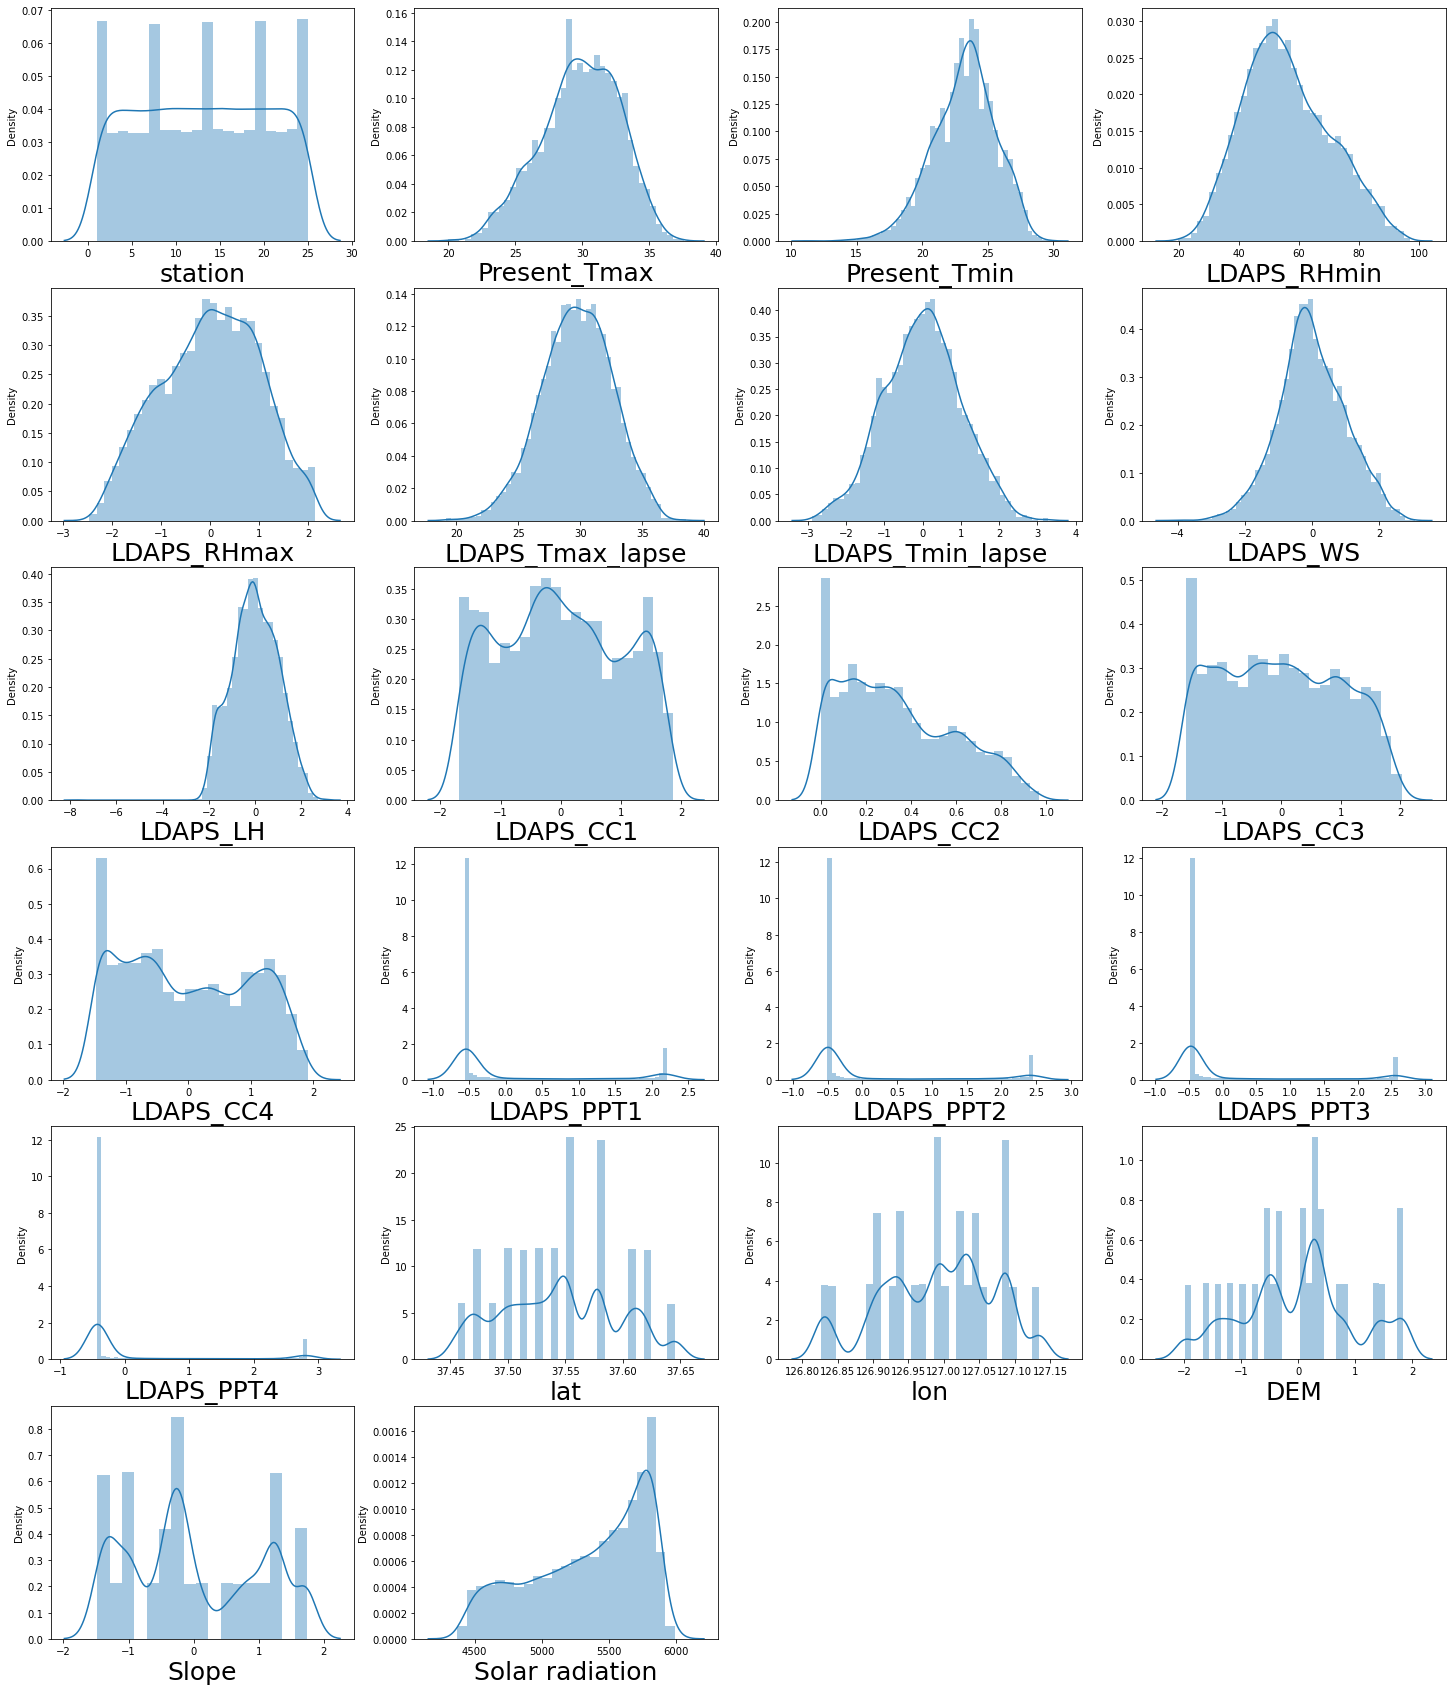

In [97]:
plt.figure(figsize=(25,30))   # here we give row and column wise dimension
plotnumber=1  # initially plotnumber is set to 1
for column in temp_11 :  #  we pass every column of dataframe into for loop
    if plotnumber<=22: # maximmum plotnumber is 3
        plt.subplot(6,4,plotnumber) # we plot all distplot in 1row and in 3 columns
        ax=sns.distplot(temp_11[column]) # we plot distribution plot for every column
        plt.xlabel(column,fontsize=25)# assign column name to each x axis
    plotnumber+=1 # plotnumber is incremented by 1
plt.show() # display graph

station                AxesSubplot(0.125,0.799681;0.227941x0.0803191)
Present_Tmax        AxesSubplot(0.398529,0.799681;0.227941x0.0803191)
Present_Tmin        AxesSubplot(0.672059,0.799681;0.227941x0.0803191)
LDAPS_RHmin            AxesSubplot(0.125,0.703298;0.227941x0.0803191)
LDAPS_RHmax         AxesSubplot(0.398529,0.703298;0.227941x0.0803191)
LDAPS_Tmax_lapse    AxesSubplot(0.672059,0.703298;0.227941x0.0803191)
LDAPS_Tmin_lapse       AxesSubplot(0.125,0.606915;0.227941x0.0803191)
LDAPS_WS            AxesSubplot(0.398529,0.606915;0.227941x0.0803191)
LDAPS_LH            AxesSubplot(0.672059,0.606915;0.227941x0.0803191)
LDAPS_CC1              AxesSubplot(0.125,0.510532;0.227941x0.0803191)
LDAPS_CC2           AxesSubplot(0.398529,0.510532;0.227941x0.0803191)
LDAPS_CC3           AxesSubplot(0.672059,0.510532;0.227941x0.0803191)
LDAPS_CC4              AxesSubplot(0.125,0.414149;0.227941x0.0803191)
LDAPS_PPT1          AxesSubplot(0.398529,0.414149;0.227941x0.0803191)
LDAPS_PPT2          

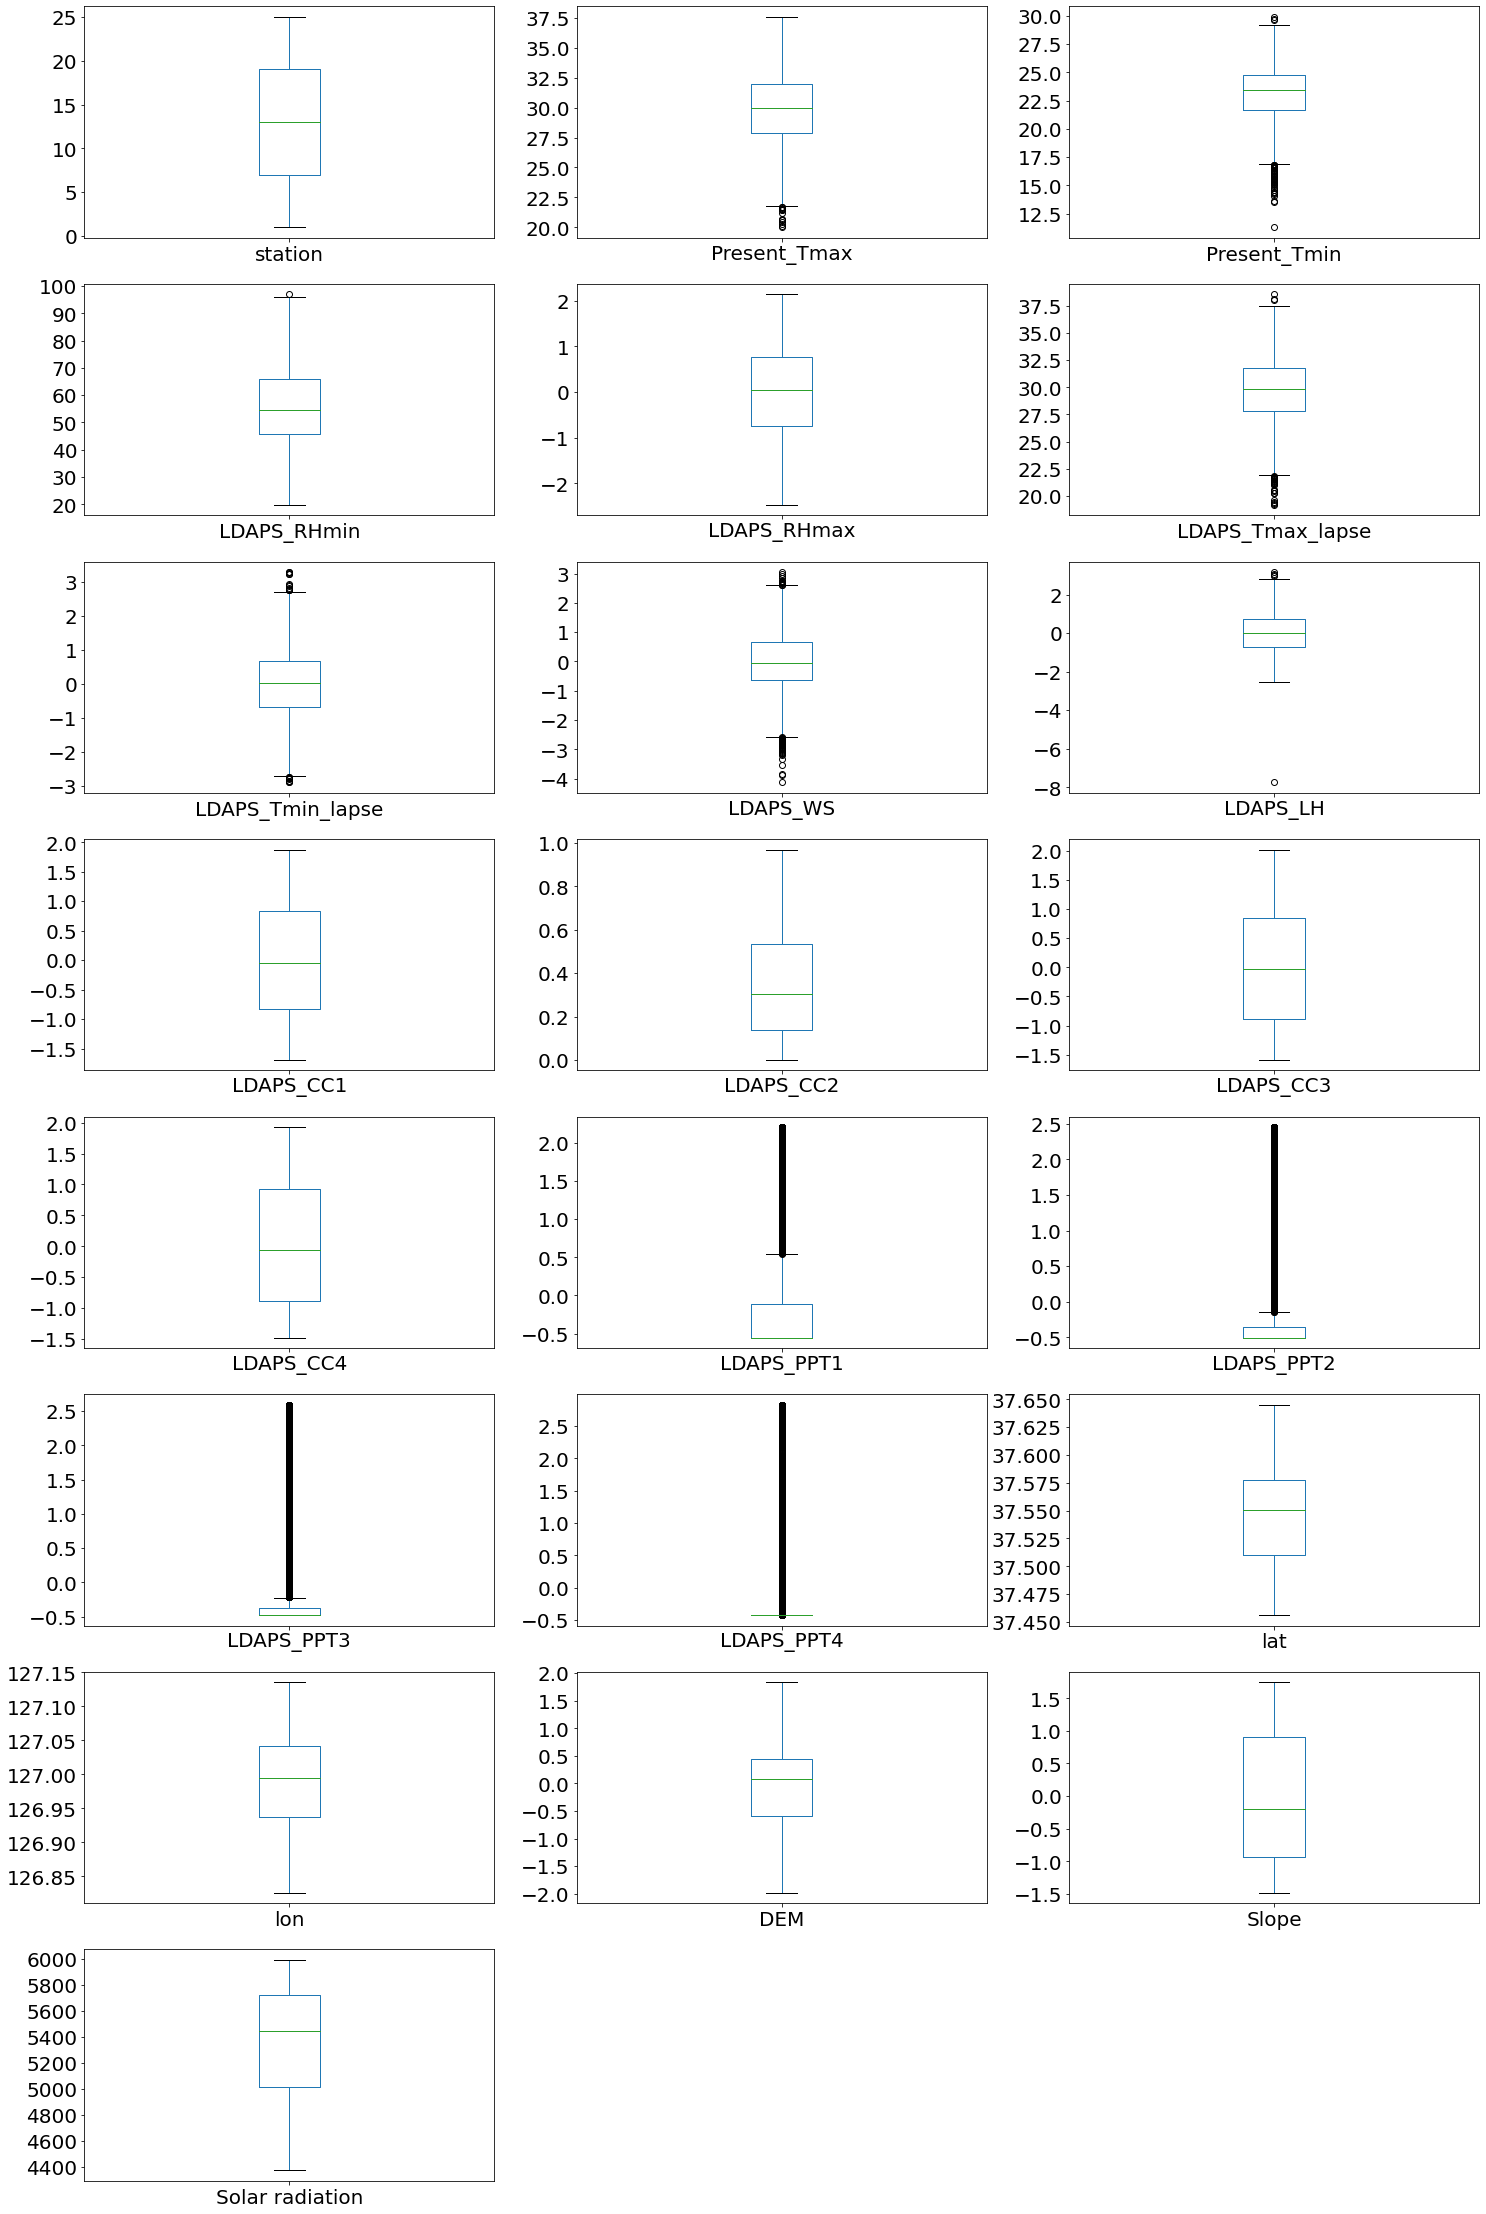

In [98]:
temp_11.plot(kind="box",subplots=True,figsize=(25,40),layout=(8,3),fontsize=20)

# Scaling using MinMaxScaler

In [99]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(temp_11)

# VIF

In [100]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [101]:
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['Feature']=temp_11.columns

In [102]:
vif

,vif,Feature
0,4.501609,station
1,34.072050,Present_Tmax
2,77.513172,Present_Tmin
3,43.794549,LDAPS_RHmin
4,18.441543,LDAPS_RHmax
5,74.484841,LDAPS_Tmax_lapse
6,57.186005,LDAPS_Tmin_lapse
7,19.460938,LDAPS_WS
8,62.615443,LDAPS_LH
9,16.799148,LDAPS_CC1


In [103]:
temp_3=pd.DataFrame(x_scaled,columns = temp_11.columns)# here converted array into dataframe
temp_3.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,0.000000,0.494318,0.543011,0.498592,0.603389,0.459531,0.415080,0.593138,0.740338,0.371824,...,0.278656,0.0,0.0,0.0,0.0,0.786017,0.533981,1.000000,0.867221,1.000000
1,0.041667,0.676136,0.553763,0.420911,0.584720,0.551256,0.488753,0.492563,0.693507,0.360670,...,0.272878,0.0,0.0,0.0,0.0,0.786017,0.666667,0.534628,0.339390,0.923771
2,0.083333,0.659091,0.645161,0.374593,0.377402,0.563678,0.529121,0.536065,0.582575,0.338912,...,0.298520,0.0,0.0,0.0,0.0,0.643008,0.750809,0.424525,0.164148,0.920220
3,0.125000,0.681818,0.650538,0.498386,0.825631,0.543715,0.437326,0.488196,0.730927,0.348437,...,0.284602,0.0,0.0,0.0,0.0,1.000000,0.634304,0.542193,0.842737,0.916155
4,0.166667,0.647727,0.569892,0.471607,0.568653,0.513217,0.448709,0.497008,0.825675,0.256372,...,0.345774,0.0,0.0,0.0,0.0,0.500530,1.000000,0.443936,0.334296,0.917751


In [104]:
temp_new = pd.concat([temp_3,temp_2],axis=1)  # here concate both dataframe after scaling

In [105]:
temp_new.shape

(7731, 26)

In [106]:
temp_new.isnull().sum()

station             501
Present_Tmax        501
Present_Tmin        501
LDAPS_RHmin         501
LDAPS_RHmax         501
LDAPS_Tmax_lapse    501
LDAPS_Tmin_lapse    501
LDAPS_WS            501
LDAPS_LH            501
LDAPS_CC1           501
LDAPS_CC2           501
LDAPS_CC3           501
LDAPS_CC4           501
LDAPS_PPT1          501
LDAPS_PPT2          501
LDAPS_PPT3          501
LDAPS_PPT4          501
lat                 501
lon                 501
DEM                 501
Slope               501
Solar radiation     501
Next_Tmax           143
Next_Tmin           143
date                143
month               143
dtype: int64

In [107]:
temp_new=temp_new.dropna(axis=0)

In [108]:
temp_new.shape

(7087, 26)

In [109]:
7087/7752

0.9142156862745098

In [110]:
temp_new.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
date                0
month               0
dtype: int64

# Now we will build model for first label y1= "Next_Tmax"

In [111]:
x=temp_new.drop(columns=['Next_Tmax','Next_Tmin'],axis=1)
y1=temp_new['Next_Tmax']
y2=temp_new['Next_Tmin']

In [112]:
y1=y1.astype('int')

In [113]:
x.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'date', 'month'],
      dtype='object')

# Feature Selection using SelectPercentile

In [114]:
from sklearn.feature_selection import SelectPercentile, chi2

In [115]:
SPercentile=SelectPercentile(score_func=chi2,percentile=70)

In [116]:
SPercentile=SPercentile.fit(x,y1)

In [117]:
# separate the feature to check p_values
cols=SPercentile.get_support(indices=True)
features=x.columns[cols]

In [118]:
df_scores=pd.DataFrame({'featuers':x.columns,'Chi2Score':SPercentile.scores_,'pvalue':SPercentile.pvalues_})

In [119]:
df_scores.sort_values(by='Chi2Score',ascending=False)

,featuers,Chi2Score,pvalue
22,date,1261.347689,4.489724e-254
14,LDAPS_PPT2,127.664268,2.755735e-17
13,LDAPS_PPT1,102.357973,1.102087e-12
16,LDAPS_PPT4,98.090756,6.269450e-12
21,Solar radiation,81.136336,5.209811e-09
15,LDAPS_PPT3,55.845589,5.317408e-05
9,LDAPS_CC1,39.562392,8.402188e-03
10,LDAPS_CC2,38.015014,1.283649e-02
12,LDAPS_CC4,37.238934,1.580131e-02
11,LDAPS_CC3,25.458584,2.278490e-01


In [120]:
print(cols)

[ 1  2  3  4  5  6  9 10 11 12 13 14 15 16 21 22 23]


In [121]:
print(features)

Index(['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_CC1', 'LDAPS_CC2',
       'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3',
       'LDAPS_PPT4', 'Solar radiation', 'date', 'month'],
      dtype='object')


In [122]:
#create subset of selected feature
x_1=temp_new[features]
y_1=temp_new.Next_Tmax

In [123]:
x_1.shape

(7087, 17)

In [124]:
y_1.shape

(7087,)

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

Train test split is used to evaluate the performance of algorithm when we have large data,It divide the data into two set,training and testing phase, training data is used for fitting machine learning model and testing data is used for evaluating model performance r2 score is statistical measure that repesent proportion of variance for dependant variable

In [126]:
# finding best random state
from sklearn.tree import DecisionTreeRegressor
max_r2=0  # initially max accuracy is set to 0
MaxRs=0  # initially Random state is set to 0
for i in range(1,200): # in for loop we pass 1 to 200 number out of which random state is selected
    x_train,x_test,y_train,y_test=train_test_split(x_1,y_1,test_size=0.25,random_state=i) # used train_test_split in for loop
    mod=DecisionTreeRegressor()
    mod.fit(x_train,y_train)  # fit training data of feature and label to model decision tree
    pred=mod.predict(x_test) # predict label by using test features
    r2=r2_score(y_test,pred) # genrate accuracy score by comparing test label and predicted label
    if r2> max_r2:
        max_r2=r2 # assign accuracy score to max accuracy
        MaxRs=i  # the number at which we get maxaccuracy is treated as random state
print('Best r2_score is',max_r2,"on Random state",MaxRs)

Best r2_score is 0.6147918136395906 on Random state 182


In [127]:
x_train,x_test,y_train,y_test=train_test_split(x_1,y_1,test_size=0.25,random_state=MaxRs)

In train test split we pass x scaled and y output, test size is 25% and random state is MaxRs which is generated by above code

In [128]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from  sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR

In [129]:
# model instantiating and training
Li_reg=LinearRegression()  # assign linear regression as Li_reg
Li_reg.fit(x_train,y_train) # fit train feature and label to linear regression


LinearRegression()

In [130]:
# find r2 score for trained model
Li_reg.score(x_train,y_train)  # find r2 score for train data

0.15643827127943932

In [131]:
# lets check,how model fits to test data
Li_reg.score(x_test,y_test)

0.14186351289549026

In [132]:
pred1=Li_reg.predict(x_test)  # now we predict label by passing test feature
Linear_regression_score=r2_score(y_test,pred1) # we get r2 score by passing predicted label and actual label
Linear_regression_score

0.14186351289549026

In [133]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [134]:
mean_absolute_error(y_test,pred1)

2.3213532054216595

mean absolute error -it represent average error

In [135]:
mean_squared_error(y_test,pred1)

8.324335788799525

It is similar to MAE but noise is largerand large error are punished.it is harder to interpret than MAE as it is not in base units

In [136]:
KNR=KNeighborsRegressor()
KNR.fit(x_train,y_train)
pred2=KNR.predict(x_test)
KNR__score=r2_score(y_test,pred2)
KNR__score

0.8498784572429694

KNN store all cases and classify new model based on distance(Euclidean method),classification done by majority of votes neighbors

In [137]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred3=DTR.predict(x_test)
DTR__score=r2_score(y_test,pred3)
DTR__score

0.6407167369323772

Decision Tree builds model in the form of tree structure,it divide the dataset into smaller and smaller subset, we determine the root node,then split the subsets,repeat the process till all instance have same class

In [138]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred4=RFR.predict(x_test)
RFR__score=r2_score(y_test,pred4)
RFR__score

0.775637260576061

It is ensemble algorithm which combines more than one algorithm of same or different kind.Random Forest gives outcome based on predictions of number of models by taking mean of output from various trees

In [139]:
ABR=AdaBoostRegressor()
ABR.fit(x_train,y_train)
pred5=ABR.predict(x_test)
ABR__score=r2_score(y_test,pred5)
ABR__score

0.24623810899069543

Adaboost regressor is meta estimator that begin by fitting a regressor on original dataset, and then fits additional copies of regressor on same dataset but where the weights of instance are adjusted

In [140]:
svr=SVR()
svr.fit(x_train,y_train)
pred6=svr.predict(x_test)
SVR__score=r2_score(y_test,pred6)
SVR__score

0.1225044607946063

SVR is effective when number of dimensions are greater than number of samples,it uses subset of training points(support vector) and hyperplane to give classification output

In [141]:
from sklearn.model_selection import KFold,cross_val_score

In [142]:
Linear_regression_cv_score=cross_val_score(Li_reg,x_train,y_train,cv=5).mean() # we pass Linear regression model,feature,target and cv=5 means 4 set for training and 1 for testing
Linear_regression_cv_score

0.15014836216265945

In [143]:
KNR_CV_score=cross_val_score(KNR,x_train,y_train,cv=5).mean() # we pass KNR model,feature,target and cv=5 means 4 set for training and 1 for testing
KNR_CV_score

0.8243253824232255

In [144]:
DTR_CV_score=cross_val_score(DTR,x_train,y_train,cv=5).mean() # we pass model Decision Tree Regressor,feature,target and cv=5 means 4 set for training and 1 for testing
DTR_CV_score

0.5017279597689087

In [145]:
RFR_CV_score=cross_val_score(RFR,x_train,y_train,cv=5).mean() # we pass model Random Forest Regressor,feature,target and cv=5 means 4 set for training and 1 for testing
RFR_CV_score

0.7515645699688575

In [146]:
ABR_CV_score=cross_val_score(ABR,x_train,y_train,cv=5,scoring='r2').mean() # we pass model Ada boost Regressor,feature,target and cv=5 means 4 set for training and 1 for testing
ABR_CV_score

0.25421692738499135

In [147]:
SVR_CV_score=cross_val_score(svr,x_train,y_train,cv=5).mean() # we pass model Support Vector Regressor,feature,target and cv=5 means 4 set for training and 1 for testing
SVR_CV_score

0.12610293195875838

In [148]:
Linear_regression_diff=Linear_regression_score*100-Linear_regression_cv_score*100
print('Linear_regression_diff',Linear_regression_diff)
KNR_diff=KNR__score*100-KNR_CV_score*100
print('KNR_diff',KNR_diff)
DTR_diff=DTR__score*100-DTR_CV_score*100
print("DTR_diff",DTR_diff)
RFR_diff=RFR__score*100-RFR_CV_score*100
print("RFR_diff",RFR_diff)
ABR_diff=ABR__score*100-ABR_CV_score*100
print("ABR_diff",ABR_diff)
SVR_diff=SVR__score*100-SVR_CV_score*100
print("SVR_diff",SVR_diff)

Linear_regression_diff -0.8284849267169179
KNR_diff 2.5553074819743955
DTR_diff 13.898877716346838
RFR_diff 2.4072690607203526
ABR_diff -0.7978818394295928
SVR_diff -0.3598471164152084


In above line, we take difference of r2 score of each model with cross vaidation score of that model, we multiply the differnce by 100 to get percentage values

In [149]:
print("Linear_regression_score",Linear_regression_score)
print("Linear_regression_cv_score", Linear_regression_cv_score)
print("Linear_regression_diff", Linear_regression_diff)
print("-------------------------------------------------------------------------------------------")
print("KNR__score",KNR__score)
print("KNR_CV_score",KNR_CV_score)
print("KNR_diff",KNR_diff)
print("-------------------------------------------------------------------------------------------")
print("DTR__score",DTR__score)
print("DTR_CV_score", DTR_CV_score)
print("DTR_diff",DTR_diff)

print("-------------------------------------------------------------------------------------------")
print("RFR__score",RFR__score)
print("RFR_CV_score",RFR_CV_score)
print("RFR_diff", RFR_diff)
print("-------------------------------------------------------------------------------------------")

print("ABR__score",ABR__score)
print("ABR_CV_score",ABR_CV_score)
print("ABR_diff",ABR_diff)
print("-------------------------------------------------------------------------------------------")
print("SVR__score",SVR__score)
print("SVR_CV_score",SVR_CV_score) 
print("SVR_diff",SVR_diff)


Linear_regression_score 0.14186351289549026
Linear_regression_cv_score 0.15014836216265945
Linear_regression_diff -0.8284849267169179
-------------------------------------------------------------------------------------------
KNR__score 0.8498784572429694
KNR_CV_score 0.8243253824232255
KNR_diff 2.5553074819743955
-------------------------------------------------------------------------------------------
DTR__score 0.6407167369323772
DTR_CV_score 0.5017279597689087
DTR_diff 13.898877716346838
-------------------------------------------------------------------------------------------
RFR__score 0.775637260576061
RFR_CV_score 0.7515645699688575
RFR_diff 2.4072690607203526
-------------------------------------------------------------------------------------------
ABR__score 0.24623810899069543
ABR_CV_score 0.25421692738499135
ABR_diff -0.7978818394295928
-------------------------------------------------------------------------------------------
SVR__score 0.1225044607946063
SVR_CV_score 0

here KNR is best model which give high accuracy as well as high CV score than other models.so we will do hyperparameter tuning for KNR

In [150]:
from sklearn.model_selection import GridSearchCV

GridsearchCV is parameter tuning approach which build and evaluate the model performance based on best parameters, we pass parameters of only those model which has less difference between accuracy and cv score. after passing the best parameter we can get best and authenticated accuracy which is not overfitted also

In [151]:
params={'n_neighbors':[5,6,7],
        'metric':['minkowski'],
       'leaf_size':[30,40,50]}

In [152]:
Grid_KNR=GridSearchCV(KNeighborsRegressor(),param_grid=params,cv=5)
Grid_KNR.fit(x_train,y_train)
Grid_KNR.best_params_

{'leaf_size': 30, 'metric': 'minkowski', 'n_neighbors': 5}

now we will pass this parameter to KNN classifier to get best r2 score

In [153]:
Final_KNR=KNeighborsRegressor(leaf_size= 30, metric='minkowski',n_neighbors= 5)
Final_KNR.fit(x_train,y_train)
final_pred1=Final_KNR.predict(x_test)
final_score1=r2_score(y_test,final_pred1)
print(final_score1*100)

84.98784572429695


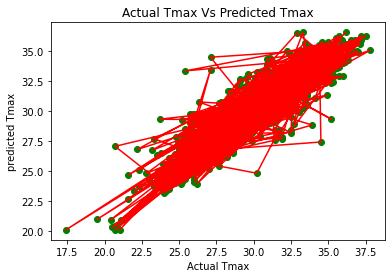

In [154]:
plt.scatter(y_test,final_pred1,color='g')  # plot scatter of actual sales Vs predicted sales
plt.plot(y_test,final_pred1,color='r') # here we plot line plot for actual sales vs predicted sales
plt.xlabel("Actual Tmax") # x axis label is "Actual Sales"
plt.ylabel("predicted Tmax")# y axis label is "predicted sales"
plt.title('Actual Tmax Vs Predicted Tmax') # Titel is given
plt.show()  # display graph

In [155]:
import joblib
joblib.dump(Final_KNR,"Temperature Forecast_Tmax.pkl")

['Temperature Forecast_Tmax.pkl']

# Now we will build model for second label y2= "Next_Tmin"

In [156]:
x=temp_new.drop(columns=['Next_Tmax','Next_Tmin'],axis=1)
y2=temp_new['Next_Tmin']

In [157]:
y2=y2.astype('int')

In [158]:
x.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'date', 'month'],
      dtype='object')

In [159]:
SPercentile=SPercentile.fit(x,y2)

In [160]:
# separate the feature to check p_values
cols2=SPercentile.get_support(indices=True)
features=x.columns[cols2]

In [161]:
df_scores1=pd.DataFrame({'featuers':x.columns,'Chi2Score':SPercentile.scores_,'pvalue':SPercentile.pvalues_})

In [162]:
df_scores1.sort_values(by='Chi2Score',ascending=False)

,featuers,Chi2Score,pvalue
22,date,762.801183,3.815890e-151
21,Solar radiation,102.033563,3.730542e-14
13,LDAPS_PPT1,78.774005,6.326471e-10
14,LDAPS_PPT2,77.553859,1.039357e-09
16,LDAPS_PPT4,58.908414,1.589328e-06
10,LDAPS_CC2,26.077588,7.305852e-02
9,LDAPS_CC1,23.320656,1.390998e-01
6,LDAPS_Tmin_lapse,22.511205,1.658499e-01
23,month,18.749161,3.431187e-01
1,Present_Tmax,17.690396,4.086198e-01


In [163]:
print(cols2)

[ 1  2  3  4  5  6  9 10 11 12 13 14 15 16 21 22 23]


In [164]:
#create subset of selected feature
x_2=temp_new[features]
y_2=temp_new.Next_Tmin

In [165]:
x_2.shape

(7087, 17)

In [166]:
y_2.shape

(7087,)

In [167]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [168]:
# finding best random state
from sklearn.tree import DecisionTreeRegressor
max_r2=0  # initially max accuracy is set to 0
MaxRs=0  # initially Random state is set to 0
for i in range(1,200): # in for loop we pass 1 to 200 number out of which random state is selected
    x_train1,x_test1,y_train1,y_test1=train_test_split(x_2,y_2,test_size=0.25,random_state=i) # used train_test_split in for loop
    mod=DecisionTreeRegressor()
    mod.fit(x_train,y_train)  # fit training data of feature and label to model decision tree
    pred=mod.predict(x_test) # predict label by using test features
    r2=r2_score(y_test,pred) # genrate accuracy score by comparing test label and predicted label
    if r2> max_r2:
        max_r2=r2 # assign accuracy score to max accuracy
        MaxRs=i  # the number at which we get maxaccuracy is treated as random state
print('Best r2_score is',max_r2,"on Random state",MaxRs)

Best r2_score is 0.656670312128349 on Random state 5


In [169]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x_2,y_2,test_size=0.25,random_state=MaxRs)

In [170]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from  sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR

In [171]:
# model instantiating and training
Li_reg=LinearRegression()  # assign linear regression as Li_reg
Li_reg.fit(x_train1,y_train1) # fit train feature and label to linear regression


LinearRegression()

In [172]:
# find r2 score for trained model
Li_reg.score(x_train1,y_train1)  # find r2 score for train data

0.2011034935360979

In [173]:
# lets check,how model fits to test data
Li_reg.score(x_test1,y_test1)

0.18926891972454363

In [174]:
pred1_=Li_reg.predict(x_test1)  # now we predict label by passing test feature
Linear_regression_score=r2_score(y_test1,pred1_) # we get r2 score by passing predicted label and actual label
Linear_regression_score

0.18926891972454363

In [175]:
mean_absolute_error(y_test1,pred1_)

1.727677740354933

In [176]:
mean_squared_error(y_test1,pred1_)

4.655542722991707

In [177]:
KNR=KNeighborsRegressor()
KNR.fit(x_train1,y_train1)
pred2_=KNR.predict(x_test1)
KNR__score=r2_score(y_test1,pred2_)
KNR__score

0.7527867539968696

In [178]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train1,y_train1)
pred3_=DTR.predict(x_test1)
DTR__score=r2_score(y_test1,pred3_)
DTR__score

0.5153020981202826

In [179]:
RFR=RandomForestRegressor()
RFR.fit(x_train1,y_train1)
pred4_=RFR.predict(x_test1)
RFR__score=r2_score(y_test1,pred4_)
RFR__score

0.7317871560252307

In [180]:
ABR=AdaBoostRegressor()
ABR.fit(x_train1,y_train1)
pred5_=ABR.predict(x_test1)
ABR__score=r2_score(y_test1,pred5_)
ABR__score

0.3712263634756108

In [181]:
svr=SVR()
svr.fit(x_train1,y_train1)
pred6_=svr.predict(x_test1)
SVR__score=r2_score(y_test1,pred6_)
SVR__score

0.22764828991347863

In [182]:
Linear_regression_cv_score=cross_val_score(Li_reg,x_train1,y_train1,cv=5).mean() # we pass Linear regression model,feature,target and cv=5 means 4 set for training and 1 for testing
Linear_regression_cv_score

0.1936773510276399

In [183]:
KNR_CV_score=cross_val_score(KNR,x_train1,y_train1,cv=5).mean() # we pass KNR model,feature,target and cv=5 means 4 set for training and 1 for testing
KNR_CV_score

0.726267434567414

In [184]:
DTR_CV_score=cross_val_score(DTR,x_train1,y_train1,cv=5).mean() # we pass model Decision Tree Regressor,feature,target and cv=5 means 4 set for training and 1 for testing
DTR_CV_score

0.46122917761038273

In [185]:
RFR_CV_score=cross_val_score(RFR,x_train1,y_train1,cv=5).mean() # we pass model Random Forest Regressor,feature,target and cv=5 means 4 set for training and 1 for testing
RFR_CV_score

0.7139232924000212

In [186]:
ABR_CV_score=cross_val_score(ABR,x_train1,y_train1,cv=5,scoring='r2').mean() # we pass model Ada boost Regressor,feature,target and cv=5 means 4 set for training and 1 for testing
ABR_CV_score

0.36276679200146356

In [187]:
SVR_CV_score=cross_val_score(svr,x_train1,y_train1,cv=5).mean() # we pass model Support Vector Regressor,feature,target and cv=5 means 4 set for training and 1 for testing
SVR_CV_score

0.1989817778894409

In [188]:
Linear_regression_diff=Linear_regression_score*100-Linear_regression_cv_score*100
print('Linear_regression_diff',Linear_regression_diff)
KNR_diff=KNR__score*100-KNR_CV_score*100
print('KNR_diff',KNR_diff)
DTR_diff=DTR__score*100-DTR_CV_score*100
print("DTR_diff",DTR_diff)
RFR_diff=RFR__score*100-RFR_CV_score*100
print("RFR_diff",RFR_diff)
ABR_diff=ABR__score*100-ABR_CV_score*100
print("ABR_diff",ABR_diff)
SVR_diff=SVR__score*100-SVR_CV_score*100
print("SVR_diff",SVR_diff)

Linear_regression_diff -0.44084313030962363
KNR_diff 2.651931942945552
DTR_diff 5.407292050989987
RFR_diff 1.7863863625209575
ABR_diff 0.8459571474147225
SVR_diff 2.866651202403773


In [189]:
print("Linear_regression_score",Linear_regression_score)
print("Linear_regression_cv_score", Linear_regression_cv_score)
print("Linear_regression_diff", Linear_regression_diff)
print("-------------------------------------------------------------------------------------------")
print("KNR__score",KNR__score)
print("KNR_CV_score",KNR_CV_score)
print("KNR_diff",KNR_diff)
print("-------------------------------------------------------------------------------------------")
print("DTR__score",DTR__score)
print("DTR_CV_score", DTR_CV_score)
print("DTR_diff",DTR_diff)

print("-------------------------------------------------------------------------------------------")
print("RFR__score",RFR__score)
print("RFR_CV_score",RFR_CV_score)
print("RFR_diff", RFR_diff)
print("-------------------------------------------------------------------------------------------")

print("ABR__score",ABR__score)
print("ABR_CV_score",ABR_CV_score)
print("ABR_diff",ABR_diff)
print("-------------------------------------------------------------------------------------------")
print("SVR__score",SVR__score)
print("SVR_CV_score",SVR_CV_score) 
print("SVR_diff",SVR_diff)


Linear_regression_score 0.18926891972454363
Linear_regression_cv_score 0.1936773510276399
Linear_regression_diff -0.44084313030962363
-------------------------------------------------------------------------------------------
KNR__score 0.7527867539968696
KNR_CV_score 0.726267434567414
KNR_diff 2.651931942945552
-------------------------------------------------------------------------------------------
DTR__score 0.5153020981202826
DTR_CV_score 0.46122917761038273
DTR_diff 5.407292050989987
-------------------------------------------------------------------------------------------
RFR__score 0.7317871560252307
RFR_CV_score 0.7139232924000212
RFR_diff 1.7863863625209575
-------------------------------------------------------------------------------------------
ABR__score 0.3712263634756108
ABR_CV_score 0.36276679200146356
ABR_diff 0.8459571474147225
-------------------------------------------------------------------------------------------
SVR__score 0.22764828991347863
SVR_CV_score 0.1

here KNR is best model which give high accuracy as well as high CV score than other models.so we will do hyperparameter tuning for KNR

In [190]:
params={'n_neighbors':[5,6,7],
        'metric':['minkowski'],
       'leaf_size':[30,40,50]}

In [191]:
Grid_KNR2=GridSearchCV(KNeighborsRegressor(),param_grid=params,cv=5)
Grid_KNR2.fit(x_train1,y_train1)
Grid_KNR2.best_params_

{'leaf_size': 30, 'metric': 'minkowski', 'n_neighbors': 5}

now we will pass this parameter to KNN Regressor to get best r2 score

In [192]:
Final_KNR2=KNeighborsRegressor(leaf_size= 30, metric='minkowski',n_neighbors= 5)
Final_KNR2.fit(x_train1,y_train1)
final_pred1_=Final_KNR2.predict(x_test1)
final_score1=r2_score(y_test1,final_pred1_)
print(final_score1*100)

75.27867539968696


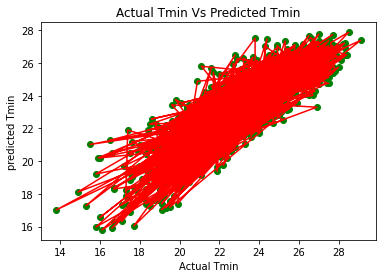

In [193]:
plt.scatter(y_test1,final_pred1_,color='g')  # plot scatter of actual Tmin Vs predicted Tmin
plt.plot(y_test1,final_pred1_,color='r') # here we plot line plot for actual Tmin vs predicted Tmin
plt.xlabel("Actual Tmin") # x axis label is "Actual Tmin"
plt.ylabel("predicted Tmin")# y axis label is "predicted Tmin"
plt.title('Actual Tmin Vs Predicted Tmin') # Titel is given
plt.show()  # display graph

In [195]:
import joblib
joblib.dump(Final_KNR2,"Temperature Forecast_Tmin.pkl")

['Temperature Forecast_Tmin.pkl']